In [3]:
import cupy as np
import cudf as pd
import matplotlib.pyplot as plt
import pickle
from library import utils, config, cascades

In [6]:
with open('./results/nopricechange/7-9/traderIDs_100_7200_100_new2threshold_fixedhurst.pkl', 'rb') as f:
    traderIDsNPC = pickle.load(f)

Importing MATLAB


In [4]:
stockPoolNPC = np.load("./results/nopricechange/7-9/stockPool_100_7200_100_new2threshold_fixedhurst.npy")
hurstPoolNPC = np.load("./results/nopricechange/7-9/hurstPool_100_7200_100_new2threshold_fixedhurst.npy")
# TtransactionsNPC = pd.read_csv("./results/nopricechange/7-9/transactions_200_7200_100_2_5.csv")
TtotalOrdersNPC = pd.read_csv("./results/nopricechange/7-9/totalOrders_100_7200_100_new2threshold_fixedhurst.csv")

In [5]:
TtotalOrdersNPC

,Unnamed: 0,time,portfolio,stock,order
0,1,993,wesyg,92,-2.0
1,3,993,wesyg,94,1.0
2,1,993,vdqtz,89,-1.0
3,2,993,vdqtz,90,1.0
4,3,993,vdqtz,91,-2.0
...,...,...,...,...,...
638535,1,8192,ypwom,86,-7.0
638536,2,8192,ypwom,47,2.0
638537,0,8192,nqtpu,43,-2.0
638538,1,8192,nqtpu,57,1.0


In [6]:
type(TtotalOrdersNPC)

cudf.core.dataframe.DataFrame

# minSep = 1

In [25]:
sizes1, nrows1, duration1 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 8192,1)

TypeError: where() missing 1 required positional argument: 'cond'

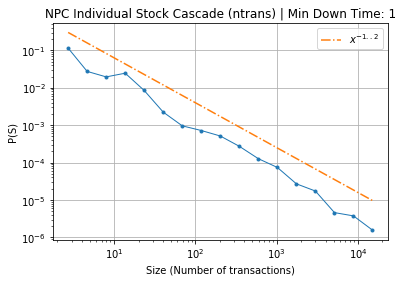

In [12]:
hist, bins = np.histogram(nrows1, bins=np.logspace(np.log10(min(nrows1)),np.log10(max(nrows1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2), '-.', label= "$x^{-1..2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

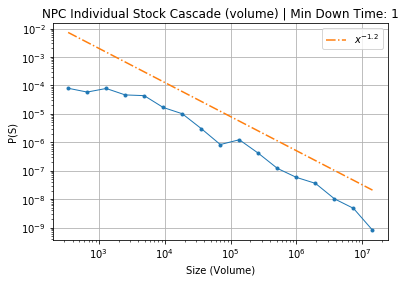

In [13]:
hist, bins = np.histogram(sizes1, bins=np.logspace(np.log10(min(sizes1)),np.log10(max(sizes1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*8, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

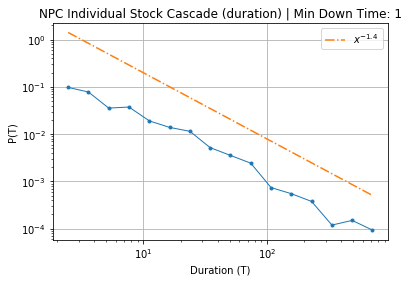

In [14]:
hist, bins = np.histogram(duration1, bins=np.logspace(np.log10(min(duration1)),np.log10(max(duration1)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.4)*5, '-.', label= "$x^{-1.4}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

# minSep = 2

In [15]:
sizes2, nrows2, duration2 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 8192, 2)

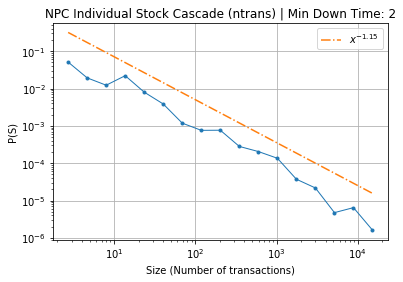

In [16]:
hist, bins = np.histogram(nrows2, bins=np.logspace(np.log10(min(nrows2)),np.log10(max(nrows2)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.15), '-.', label= "$x^{-1.15}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

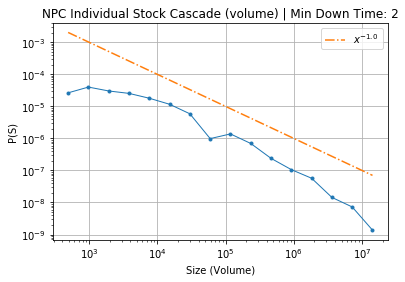

In [17]:
hist, bins = np.histogram(sizes2, bins=np.logspace(np.log10(min(sizes2)),np.log10(max(sizes2)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

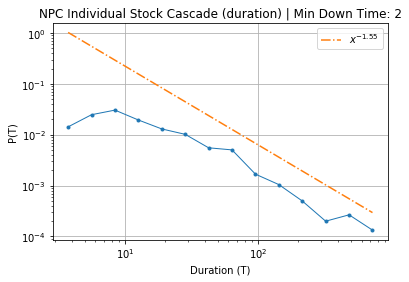

In [18]:
hist, bins = np.histogram(duration2, bins=np.logspace(np.log10(min(duration2)),np.log10(max(duration2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*8, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

# minSep = 5

In [19]:
sizes5, nrows5, duration5 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 8192, 5)

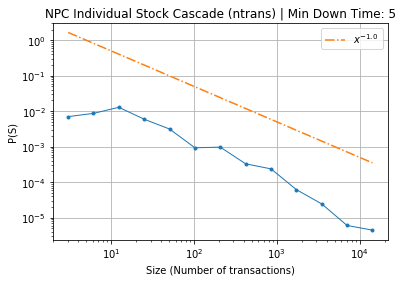

In [20]:
hist, bins = np.histogram(nrows5, bins=np.logspace(np.log10(min(nrows5)),np.log10(max(nrows5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.0)*5, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

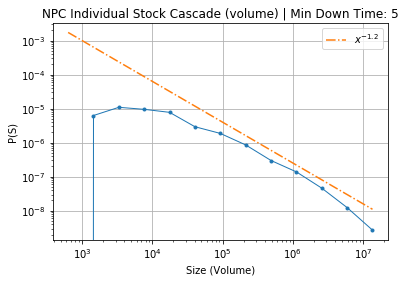

In [21]:
hist, bins = np.histogram(sizes5, bins=np.logspace(np.log10(min(sizes5)),np.log10(max(sizes5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*4, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

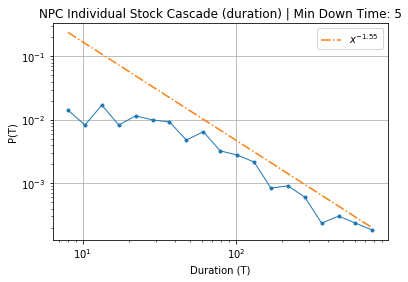

In [22]:
hist, bins = np.histogram(duration5, bins=np.logspace(np.log10(min(duration5)),np.log10(max(duration5)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*6, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 5")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

# minSep = 10

In [23]:
sizes10, nrows10, duration10 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 8192, 10)

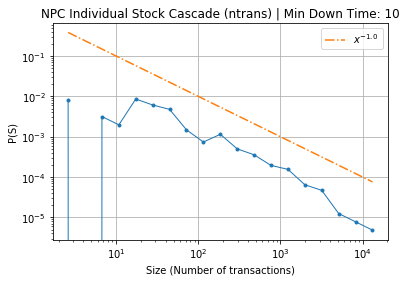

In [24]:
hist, bins = np.histogram(nrows10, bins=np.logspace(np.log10(min(nrows10)),np.log10(max(nrows10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

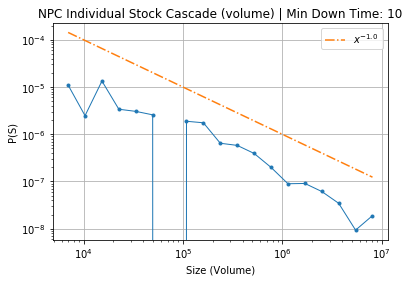

In [25]:
hist, bins = np.histogram(sizes10, bins=np.logspace(np.log10(min(sizes10)),np.log10(max(sizes10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_volume_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

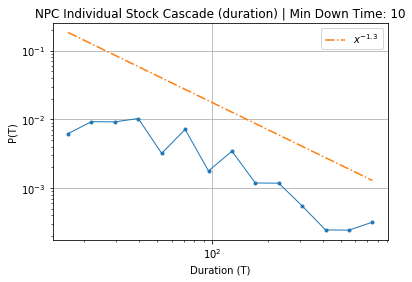

In [26]:
hist, bins = np.histogram(duration10, bins=np.logspace(np.log10(min(duration10)),np.log10(max(duration10)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 10")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

# Causal Cascades

In [5]:
def findCascadesGPU(TtotalOrders, traderIDs, maxtimeeff, maxSep):
    """
    find causal cascades USING GPU
    conda activate rapids-0.16
    """

    TtotalOrders = TtotalOrdersNPC
    cascades = {}
    numCascade = 0
    while len(TtotalOrders) > 0:
        print("OG Orders left: ", len(TtotalOrders))
        
        # Seed portfolio to begin the cascade
        seed = TtotalOrders['portfolio'].loc[0]
        t0 = TtotalOrders['time'].loc[0]
        seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
        cascades[numCascade] = seedCascade

        # Dictionary keeping track of how long a stock is still "affected" from previous trade
        stockTimes = {}

        for row in np.asarray(seedCascade.index):
            row = row.item()
            stock = seedCascade['stock'].loc[row]
            time = seedCascade['time'].loc[row]
            order = seedCascade['order'].loc[row]
            if stock in stockTimes:
                stockTimes[stock] += abs(order)*maxtimeeff
            else:
                stockTimes[stock] = time + abs(order)*maxtimeeff

        # check first cascade is greater than 0
        assert len(seedCascade) > 0

        # remove rows included in first cascade from the order list
        TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)

        #PT2 Portfolio perspective
        for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
            match = False
             # see if the current portfolio has overlapping stocks with the ongoing cascade 
            if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
                 # check if overlapping portfolio is already included in the ongoing cascade
                if childPortf not in cascades[numCascade]['portfolio']:
                     # include new portfolio into the cascade along with all of its cascading trading activity
                    childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
                     # check if trading activity falls into the time affect window of ongoing cascade
                    for row in np.asarray(childPortfCascade.index):
                        row = row.item()
                        stock = childPortfCascade['stock'].loc[row]
                        time = childPortfCascade['time'].loc[row]
                        order = childPortfCascade['order'].loc[row]
                        if stock in stockTimes:
                            if time <= stockTimes[stock]:
                                match = True
                                break 
                                
                    if match == True:        
                         # add new cascade to the ongoing cascade and remove rows from the orderList
                        cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
                        TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
                        
                         # add new stocks and their time affects, or extend time affects of previous stocks
                        for row in np.asarray(childPortfCascade.index):
                            row = row.item()
                            stock = childPortfCascade['stock'].loc[row]
                            time = childPortfCascade['time'].loc[row]
                            order = childPortfCascade['order'].loc[row]
                            if stock in stockTimes:
                                stockTimes[stock] += abs(order)*maxtimeeff
                            else:
                                stockTimes[stock] = time + abs(order)*maxtimeeff

        print("Cascade length: ",len(cascades[numCascade]))
        print("New Orders left: ", len(TtotalOrders))
        print("making new cascade")
        print("\n")
        numCascade += 1
        TtotalOrders.reset_index(drop = True, inplace=True)
        
    return cascades

def cascadeAnalyzerGPU(cascades, stockPool, t0 , tf):
    """
    returns arrays of general cascade sizes (value), nrows, and duration for histogramming
    CALL FINDCASCADES FIRST FOR CAUSAL CASCADES
    """
    sizes = np.array([])
    nrows = np.array([])
    duration = np.array([])
    numCascade = len(cascades)
    for i in range(numCascade):
        casc = cascades[i]
        if casc['time'].min() > t0 and casc['time'].max() < tf:
            size = 0
            for row in range(len(casc)):
                time = (casc['time'].iloc[row])
                stock = (casc['stock'].iloc[row])
                volume = (casc['order'].iloc[row])
                size += stockPool[stock][time]*abs(volume)
            dur = casc['time'].max()-casc['time'].min()
            if dur == 0:
                dur = 1
            duration = np.concatenate((duration, np.array([int(dur)])))
            sizes = np.concatenate((sizes, np.array([int(size)])))
            nrows = np.concatenate((nrows, np.array([int(len(casc))])))
        # else:
            # print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))
            
    return sizes, nrows, duration

def findPortfOrderCascadeGPU(TtotalOrders, portf, t0, maxSep = 1):
    """
    finds all subsequent activity traded by a portfolio (time threshold) (1 cascade only)
    input TtotalOrders, the portfolio, and minimum time
    Using Portf cascade is more logical than stock cascade
    FOR REAL CASCADES Aug18
    """

    portfOrders = TtotalOrders[TtotalOrders['portfolio']==portf]
    portfOrders = portfOrders[portfOrders['time']>=t0]

    if len(portfOrders)>0:
        ToS = portfOrders['time'].unique()
        sep = np.diff(ToS)
        keySep = np.where(sep>maxSep)[0]
        if len(keySep)>0:
            endtime = int(ToS.take(int(keySep[0]))) #end of this cascade

        else:
            endtime = int(ToS.take(-1))

        portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]
        return portfCascade
    
    else:
        return pd.DataFrame()

#Potential faster code?
# stockTimes = Dict.empty(key_type=types.uint64, value_type=types.uint64)
# # global stockTimes
# def stockTimer(stock,time, order, out1, maxtimeeff):
#     for i, (s,t,o) in enumerate(zip(stock,time,order)):
#         out1[i] = t + abs(o*maxtimeeff)
#         if s not in stockTimes:
#             stockTimes[int(s)] = int(t + abs(o)*maxtimeeff)
#         else:
#             stockTimes[int(s)] += int(abs(o)*maxtimeeff)
# seedCascade = seedCascade.apply_rows(stockTimer, 
#                        incols=['stock', 'time', 'order'],
#                        outcols=dict(out1=np.int64),
#                        kwargs=dict(maxtimeeff=2))


In [7]:
causalCascades22 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 2, maxSep = 2)
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=8192)
with open('../causalCascades22_npc_100_7200_100_new2threshold_fixedhurst.pkl', 'wb') as handle:
    pickle.dump(causalCascades22, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  1425670
Cascade length:  11686
New Orders left:  1413984
making new cascade


OG Orders left:  1413984
Cascade length:  5169
New Orders left:  1408815
making new cascade


OG Orders left:  1408815
Cascade length:  5692
New Orders left:  1403123
making new cascade


OG Orders left:  1403123
Cascade length:  2979
New Orders left:  1400144
making new cascade


OG Orders left:  1400144
Cascade length:  2886
New Orders left:  1397258
making new cascade


OG Orders left:  1397258
Cascade length:  6438
New Orders left:  1390820
making new cascade


OG Orders left:  1390820
Cascade length:  2045
New Orders left:  1388775
making new cascade


OG Orders left:  1388775
Cascade length:  2535
New Orders left:  1386240
making new cascade


OG Orders left:  1386240
Cascade length:  2350
New Orders left:  1383890
making new cascade


OG Orders left:  1383890
Cascade length:  3885
New Orders left:  1380005
making new cascade


OG Orders left:  1380005
Cascade length:  874
New Orders le

Cascade length:  18
New Orders left:  1299266
making new cascade


OG Orders left:  1299266
Cascade length:  973
New Orders left:  1298293
making new cascade


OG Orders left:  1298293
Cascade length:  1133
New Orders left:  1297160
making new cascade


OG Orders left:  1297160
Cascade length:  4
New Orders left:  1297156
making new cascade


OG Orders left:  1297156
Cascade length:  1087
New Orders left:  1296069
making new cascade


OG Orders left:  1296069
Cascade length:  62
New Orders left:  1296007
making new cascade


OG Orders left:  1296007
Cascade length:  16
New Orders left:  1295991
making new cascade


OG Orders left:  1295991
Cascade length:  865
New Orders left:  1295126
making new cascade


OG Orders left:  1295126
Cascade length:  835
New Orders left:  1294291
making new cascade


OG Orders left:  1294291
Cascade length:  560
New Orders left:  1293731
making new cascade


OG Orders left:  1293731
Cascade length:  48
New Orders left:  1293683
making new cascade


OG Ord

Cascade length:  2
New Orders left:  1253939
making new cascade


OG Orders left:  1253939
Cascade length:  494
New Orders left:  1253445
making new cascade


OG Orders left:  1253445
Cascade length:  1341
New Orders left:  1252104
making new cascade


OG Orders left:  1252104
Cascade length:  591
New Orders left:  1251513
making new cascade


OG Orders left:  1251513
Cascade length:  2
New Orders left:  1251511
making new cascade


OG Orders left:  1251511
Cascade length:  21
New Orders left:  1251490
making new cascade


OG Orders left:  1251490
Cascade length:  34
New Orders left:  1251456
making new cascade


OG Orders left:  1251456
Cascade length:  1014
New Orders left:  1250442
making new cascade


OG Orders left:  1250442
Cascade length:  3
New Orders left:  1250439
making new cascade


OG Orders left:  1250439
Cascade length:  1593
New Orders left:  1248846
making new cascade


OG Orders left:  1248846
Cascade length:  1210
New Orders left:  1247636
making new cascade


OG Ord

Cascade length:  1050
New Orders left:  1211977
making new cascade


OG Orders left:  1211977
Cascade length:  4
New Orders left:  1211973
making new cascade


OG Orders left:  1211973
Cascade length:  364
New Orders left:  1211609
making new cascade


OG Orders left:  1211609
Cascade length:  634
New Orders left:  1210975
making new cascade


OG Orders left:  1210975
Cascade length:  6
New Orders left:  1210969
making new cascade


OG Orders left:  1210969
Cascade length:  1
New Orders left:  1210968
making new cascade


OG Orders left:  1210968
Cascade length:  1687
New Orders left:  1209281
making new cascade


OG Orders left:  1209281
Cascade length:  1402
New Orders left:  1207879
making new cascade


OG Orders left:  1207879
Cascade length:  13
New Orders left:  1207866
making new cascade


OG Orders left:  1207866
Cascade length:  2096
New Orders left:  1205770
making new cascade


OG Orders left:  1205770
Cascade length:  5
New Orders left:  1205765
making new cascade


OG Orde

Cascade length:  790
New Orders left:  1144179
making new cascade


OG Orders left:  1144179
Cascade length:  1395
New Orders left:  1142784
making new cascade


OG Orders left:  1142784
Cascade length:  1781
New Orders left:  1141003
making new cascade


OG Orders left:  1141003
Cascade length:  610
New Orders left:  1140393
making new cascade


OG Orders left:  1140393
Cascade length:  26
New Orders left:  1140367
making new cascade


OG Orders left:  1140367
Cascade length:  2065
New Orders left:  1138302
making new cascade


OG Orders left:  1138302
Cascade length:  17
New Orders left:  1138285
making new cascade


OG Orders left:  1138285
Cascade length:  1107
New Orders left:  1137178
making new cascade


OG Orders left:  1137178
Cascade length:  253
New Orders left:  1136925
making new cascade


OG Orders left:  1136925
Cascade length:  45
New Orders left:  1136880
making new cascade


OG Orders left:  1136880
Cascade length:  916
New Orders left:  1135964
making new cascade


O

Cascade length:  813
New Orders left:  1087392
making new cascade


OG Orders left:  1087392
Cascade length:  2
New Orders left:  1087390
making new cascade


OG Orders left:  1087390
Cascade length:  2
New Orders left:  1087388
making new cascade


OG Orders left:  1087388
Cascade length:  611
New Orders left:  1086777
making new cascade


OG Orders left:  1086777
Cascade length:  1301
New Orders left:  1085476
making new cascade


OG Orders left:  1085476
Cascade length:  982
New Orders left:  1084494
making new cascade


OG Orders left:  1084494
Cascade length:  160
New Orders left:  1084334
making new cascade


OG Orders left:  1084334
Cascade length:  2
New Orders left:  1084332
making new cascade


OG Orders left:  1084332
Cascade length:  4
New Orders left:  1084328
making new cascade


OG Orders left:  1084328
Cascade length:  35
New Orders left:  1084293
making new cascade


OG Orders left:  1084293
Cascade length:  23
New Orders left:  1084270
making new cascade


OG Orders l

Cascade length:  10
New Orders left:  1041802
making new cascade


OG Orders left:  1041802
Cascade length:  1272
New Orders left:  1040530
making new cascade


OG Orders left:  1040530
Cascade length:  74
New Orders left:  1040456
making new cascade


OG Orders left:  1040456
Cascade length:  16
New Orders left:  1040440
making new cascade


OG Orders left:  1040440
Cascade length:  1161
New Orders left:  1039279
making new cascade


OG Orders left:  1039279
Cascade length:  22
New Orders left:  1039257
making new cascade


OG Orders left:  1039257
Cascade length:  487
New Orders left:  1038770
making new cascade


OG Orders left:  1038770
Cascade length:  319
New Orders left:  1038451
making new cascade


OG Orders left:  1038451
Cascade length:  7
New Orders left:  1038444
making new cascade


OG Orders left:  1038444
Cascade length:  756
New Orders left:  1037688
making new cascade


OG Orders left:  1037688
Cascade length:  567
New Orders left:  1037121
making new cascade


OG Ord

Cascade length:  1315
New Orders left:  997100
making new cascade


OG Orders left:  997100
Cascade length:  6
New Orders left:  997094
making new cascade


OG Orders left:  997094
Cascade length:  128
New Orders left:  996966
making new cascade


OG Orders left:  996966
Cascade length:  1904
New Orders left:  995062
making new cascade


OG Orders left:  995062
Cascade length:  131
New Orders left:  994931
making new cascade


OG Orders left:  994931
Cascade length:  101
New Orders left:  994830
making new cascade


OG Orders left:  994830
Cascade length:  795
New Orders left:  994035
making new cascade


OG Orders left:  994035
Cascade length:  5
New Orders left:  994030
making new cascade


OG Orders left:  994030
Cascade length:  32
New Orders left:  993998
making new cascade


OG Orders left:  993998
Cascade length:  7
New Orders left:  993991
making new cascade


OG Orders left:  993991
Cascade length:  196
New Orders left:  993795
making new cascade


OG Orders left:  993795
Casc

Cascade length:  600
New Orders left:  935446
making new cascade


OG Orders left:  935446
Cascade length:  440
New Orders left:  935006
making new cascade


OG Orders left:  935006
Cascade length:  732
New Orders left:  934274
making new cascade


OG Orders left:  934274
Cascade length:  285
New Orders left:  933989
making new cascade


OG Orders left:  933989
Cascade length:  1083
New Orders left:  932906
making new cascade


OG Orders left:  932906
Cascade length:  3198
New Orders left:  929708
making new cascade


OG Orders left:  929708
Cascade length:  145
New Orders left:  929563
making new cascade


OG Orders left:  929563
Cascade length:  4007
New Orders left:  925556
making new cascade


OG Orders left:  925556
Cascade length:  631
New Orders left:  924925
making new cascade


OG Orders left:  924925
Cascade length:  592
New Orders left:  924333
making new cascade


OG Orders left:  924333
Cascade length:  38
New Orders left:  924295
making new cascade


OG Orders left:  9242

Cascade length:  1504
New Orders left:  877065
making new cascade


OG Orders left:  877065
Cascade length:  3
New Orders left:  877062
making new cascade


OG Orders left:  877062
Cascade length:  589
New Orders left:  876473
making new cascade


OG Orders left:  876473
Cascade length:  9
New Orders left:  876464
making new cascade


OG Orders left:  876464
Cascade length:  1391
New Orders left:  875073
making new cascade


OG Orders left:  875073
Cascade length:  26
New Orders left:  875047
making new cascade


OG Orders left:  875047
Cascade length:  2982
New Orders left:  872065
making new cascade


OG Orders left:  872065
Cascade length:  2
New Orders left:  872063
making new cascade


OG Orders left:  872063
Cascade length:  11
New Orders left:  872052
making new cascade


OG Orders left:  872052
Cascade length:  1125
New Orders left:  870927
making new cascade


OG Orders left:  870927
Cascade length:  1355
New Orders left:  869572
making new cascade


OG Orders left:  869572
Ca

Cascade length:  1111
New Orders left:  803178
making new cascade


OG Orders left:  803178
Cascade length:  1577
New Orders left:  801601
making new cascade


OG Orders left:  801601
Cascade length:  1248
New Orders left:  800353
making new cascade


OG Orders left:  800353
Cascade length:  1432
New Orders left:  798921
making new cascade


OG Orders left:  798921
Cascade length:  56
New Orders left:  798865
making new cascade


OG Orders left:  798865
Cascade length:  1247
New Orders left:  797618
making new cascade


OG Orders left:  797618
Cascade length:  897
New Orders left:  796721
making new cascade


OG Orders left:  796721
Cascade length:  1973
New Orders left:  794748
making new cascade


OG Orders left:  794748
Cascade length:  734
New Orders left:  794014
making new cascade


OG Orders left:  794014
Cascade length:  44
New Orders left:  793970
making new cascade


OG Orders left:  793970
Cascade length:  710
New Orders left:  793260
making new cascade


OG Orders left:  79

Cascade length:  1368
New Orders left:  727442
making new cascade


OG Orders left:  727442
Cascade length:  1718
New Orders left:  725724
making new cascade


OG Orders left:  725724
Cascade length:  3
New Orders left:  725721
making new cascade


OG Orders left:  725721
Cascade length:  642
New Orders left:  725079
making new cascade


OG Orders left:  725079
Cascade length:  2
New Orders left:  725077
making new cascade


OG Orders left:  725077
Cascade length:  432
New Orders left:  724645
making new cascade


OG Orders left:  724645
Cascade length:  733
New Orders left:  723912
making new cascade


OG Orders left:  723912
Cascade length:  40
New Orders left:  723872
making new cascade


OG Orders left:  723872
Cascade length:  2
New Orders left:  723870
making new cascade


OG Orders left:  723870
Cascade length:  64
New Orders left:  723806
making new cascade


OG Orders left:  723806
Cascade length:  1356
New Orders left:  722450
making new cascade


OG Orders left:  722450
Casc

Cascade length:  655
New Orders left:  678619
making new cascade


OG Orders left:  678619
Cascade length:  60
New Orders left:  678559
making new cascade


OG Orders left:  678559
Cascade length:  925
New Orders left:  677634
making new cascade


OG Orders left:  677634
Cascade length:  582
New Orders left:  677052
making new cascade


OG Orders left:  677052
Cascade length:  543
New Orders left:  676509
making new cascade


OG Orders left:  676509
Cascade length:  1204
New Orders left:  675305
making new cascade


OG Orders left:  675305
Cascade length:  173
New Orders left:  675132
making new cascade


OG Orders left:  675132
Cascade length:  736
New Orders left:  674396
making new cascade


OG Orders left:  674396
Cascade length:  1395
New Orders left:  673001
making new cascade


OG Orders left:  673001
Cascade length:  24
New Orders left:  672977
making new cascade


OG Orders left:  672977
Cascade length:  56
New Orders left:  672921
making new cascade


OG Orders left:  672921


Cascade length:  3
New Orders left:  603226
making new cascade


OG Orders left:  603226
Cascade length:  550
New Orders left:  602676
making new cascade


OG Orders left:  602676
Cascade length:  34
New Orders left:  602642
making new cascade


OG Orders left:  602642
Cascade length:  1268
New Orders left:  601374
making new cascade


OG Orders left:  601374
Cascade length:  1116
New Orders left:  600258
making new cascade


OG Orders left:  600258
Cascade length:  1675
New Orders left:  598583
making new cascade


OG Orders left:  598583
Cascade length:  1866
New Orders left:  596717
making new cascade


OG Orders left:  596717
Cascade length:  1
New Orders left:  596716
making new cascade


OG Orders left:  596716
Cascade length:  1196
New Orders left:  595520
making new cascade


OG Orders left:  595520
Cascade length:  84
New Orders left:  595436
making new cascade


OG Orders left:  595436
Cascade length:  1917
New Orders left:  593519
making new cascade


OG Orders left:  593519

Cascade length:  1702
New Orders left:  522402
making new cascade


OG Orders left:  522402
Cascade length:  930
New Orders left:  521472
making new cascade


OG Orders left:  521472
Cascade length:  1074
New Orders left:  520398
making new cascade


OG Orders left:  520398
Cascade length:  385
New Orders left:  520013
making new cascade


OG Orders left:  520013
Cascade length:  867
New Orders left:  519146
making new cascade


OG Orders left:  519146
Cascade length:  1606
New Orders left:  517540
making new cascade


OG Orders left:  517540
Cascade length:  449
New Orders left:  517091
making new cascade


OG Orders left:  517091
Cascade length:  21
New Orders left:  517070
making new cascade


OG Orders left:  517070
Cascade length:  1434
New Orders left:  515636
making new cascade


OG Orders left:  515636
Cascade length:  280
New Orders left:  515356
making new cascade


OG Orders left:  515356
Cascade length:  1272
New Orders left:  514084
making new cascade


OG Orders left:  51

Cascade length:  43
New Orders left:  476314
making new cascade


OG Orders left:  476314
Cascade length:  2953
New Orders left:  473361
making new cascade


OG Orders left:  473361
Cascade length:  2
New Orders left:  473359
making new cascade


OG Orders left:  473359
Cascade length:  588
New Orders left:  472771
making new cascade


OG Orders left:  472771
Cascade length:  20
New Orders left:  472751
making new cascade


OG Orders left:  472751
Cascade length:  83
New Orders left:  472668
making new cascade


OG Orders left:  472668
Cascade length:  905
New Orders left:  471763
making new cascade


OG Orders left:  471763
Cascade length:  20
New Orders left:  471743
making new cascade


OG Orders left:  471743
Cascade length:  65
New Orders left:  471678
making new cascade


OG Orders left:  471678
Cascade length:  258
New Orders left:  471420
making new cascade


OG Orders left:  471420
Cascade length:  553
New Orders left:  470867
making new cascade


OG Orders left:  470867
Casca

Cascade length:  1035
New Orders left:  421332
making new cascade


OG Orders left:  421332
Cascade length:  744
New Orders left:  420588
making new cascade


OG Orders left:  420588
Cascade length:  680
New Orders left:  419908
making new cascade


OG Orders left:  419908
Cascade length:  822
New Orders left:  419086
making new cascade


OG Orders left:  419086
Cascade length:  555
New Orders left:  418531
making new cascade


OG Orders left:  418531
Cascade length:  55
New Orders left:  418476
making new cascade


OG Orders left:  418476
Cascade length:  15
New Orders left:  418461
making new cascade


OG Orders left:  418461
Cascade length:  32
New Orders left:  418429
making new cascade


OG Orders left:  418429
Cascade length:  1145
New Orders left:  417284
making new cascade


OG Orders left:  417284
Cascade length:  49
New Orders left:  417235
making new cascade


OG Orders left:  417235
Cascade length:  755
New Orders left:  416480
making new cascade


OG Orders left:  416480
C

Cascade length:  52
New Orders left:  357373
making new cascade


OG Orders left:  357373
Cascade length:  532
New Orders left:  356841
making new cascade


OG Orders left:  356841
Cascade length:  51
New Orders left:  356790
making new cascade


OG Orders left:  356790
Cascade length:  190
New Orders left:  356600
making new cascade


OG Orders left:  356600
Cascade length:  506
New Orders left:  356094
making new cascade


OG Orders left:  356094
Cascade length:  148
New Orders left:  355946
making new cascade


OG Orders left:  355946
Cascade length:  380
New Orders left:  355566
making new cascade


OG Orders left:  355566
Cascade length:  1405
New Orders left:  354161
making new cascade


OG Orders left:  354161
Cascade length:  1
New Orders left:  354160
making new cascade


OG Orders left:  354160
Cascade length:  2656
New Orders left:  351504
making new cascade


OG Orders left:  351504
Cascade length:  2
New Orders left:  351502
making new cascade


OG Orders left:  351502
Cas

Cascade length:  822
New Orders left:  301394
making new cascade


OG Orders left:  301394
Cascade length:  389
New Orders left:  301005
making new cascade


OG Orders left:  301005
Cascade length:  2534
New Orders left:  298471
making new cascade


OG Orders left:  298471
Cascade length:  291
New Orders left:  298180
making new cascade


OG Orders left:  298180
Cascade length:  1611
New Orders left:  296569
making new cascade


OG Orders left:  296569
Cascade length:  1
New Orders left:  296568
making new cascade


OG Orders left:  296568
Cascade length:  14
New Orders left:  296554
making new cascade


OG Orders left:  296554
Cascade length:  2175
New Orders left:  294379
making new cascade


OG Orders left:  294379
Cascade length:  26
New Orders left:  294353
making new cascade


OG Orders left:  294353
Cascade length:  5
New Orders left:  294348
making new cascade


OG Orders left:  294348
Cascade length:  26
New Orders left:  294322
making new cascade


OG Orders left:  294322
Cas

Cascade length:  398
New Orders left:  223571
making new cascade


OG Orders left:  223571
Cascade length:  659
New Orders left:  222912
making new cascade


OG Orders left:  222912
Cascade length:  1348
New Orders left:  221564
making new cascade


OG Orders left:  221564
Cascade length:  1137
New Orders left:  220427
making new cascade


OG Orders left:  220427
Cascade length:  583
New Orders left:  219844
making new cascade


OG Orders left:  219844
Cascade length:  947
New Orders left:  218897
making new cascade


OG Orders left:  218897
Cascade length:  641
New Orders left:  218256
making new cascade


OG Orders left:  218256
Cascade length:  2378
New Orders left:  215878
making new cascade


OG Orders left:  215878
Cascade length:  514
New Orders left:  215364
making new cascade


OG Orders left:  215364
Cascade length:  27
New Orders left:  215337
making new cascade


OG Orders left:  215337
Cascade length:  184
New Orders left:  215153
making new cascade


OG Orders left:  2151

Cascade length:  2
New Orders left:  132129
making new cascade


OG Orders left:  132129
Cascade length:  807
New Orders left:  131322
making new cascade


OG Orders left:  131322
Cascade length:  1
New Orders left:  131321
making new cascade


OG Orders left:  131321
Cascade length:  15
New Orders left:  131306
making new cascade


OG Orders left:  131306
Cascade length:  3614
New Orders left:  127692
making new cascade


OG Orders left:  127692
Cascade length:  1601
New Orders left:  126091
making new cascade


OG Orders left:  126091
Cascade length:  4158
New Orders left:  121933
making new cascade


OG Orders left:  121933
Cascade length:  2375
New Orders left:  119558
making new cascade


OG Orders left:  119558
Cascade length:  20
New Orders left:  119538
making new cascade


OG Orders left:  119538
Cascade length:  15
New Orders left:  119523
making new cascade


OG Orders left:  119523
Cascade length:  578
New Orders left:  118945
making new cascade


OG Orders left:  118945
Ca

Cascade length:  27
New Orders left:  43897
making new cascade


OG Orders left:  43897
Cascade length:  23
New Orders left:  43874
making new cascade


OG Orders left:  43874
Cascade length:  995
New Orders left:  42879
making new cascade


OG Orders left:  42879
Cascade length:  861
New Orders left:  42018
making new cascade


OG Orders left:  42018
Cascade length:  1634
New Orders left:  40384
making new cascade


OG Orders left:  40384
Cascade length:  1261
New Orders left:  39123
making new cascade


OG Orders left:  39123
Cascade length:  1782
New Orders left:  37341
making new cascade


OG Orders left:  37341
Cascade length:  570
New Orders left:  36771
making new cascade


OG Orders left:  36771
Cascade length:  55
New Orders left:  36716
making new cascade


OG Orders left:  36716
Cascade length:  231
New Orders left:  36485
making new cascade


OG Orders left:  36485
Cascade length:  1188
New Orders left:  35297
making new cascade


OG Orders left:  35297
Cascade length:  860

Cascade length:  30
New Orders left:  41
making new cascade


OG Orders left:  41
Cascade length:  6
New Orders left:  35
making new cascade


OG Orders left:  35
Cascade length:  18
New Orders left:  17
making new cascade


OG Orders left:  17
Cascade length:  14
New Orders left:  3
making new cascade


OG Orders left:  3
Cascade length:  3
New Orders left:  0
making new cascade




In [8]:
causalCascades21 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 2, maxSep = 1)
npcsizes21, npcnrows21, npcduration21 = cascadeAnalyzerGPU(causalCascades21, stockPoolNPC, t0=993, tf=8192)
with open('../causalCascades21_npc_100_7200_100_new2threshold_fixedhurst.pkl', 'wb') as handle:
    pickle.dump(causalCascades21, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  1425670
Cascade length:  1644
New Orders left:  1424026
making new cascade


OG Orders left:  1424026
Cascade length:  1224
New Orders left:  1422802
making new cascade


OG Orders left:  1422802
Cascade length:  1310
New Orders left:  1421492
making new cascade


OG Orders left:  1421492
Cascade length:  1390
New Orders left:  1420102
making new cascade


OG Orders left:  1420102
Cascade length:  1680
New Orders left:  1418422
making new cascade


OG Orders left:  1418422
Cascade length:  1540
New Orders left:  1416882
making new cascade


OG Orders left:  1416882
Cascade length:  1278
New Orders left:  1415604
making new cascade


OG Orders left:  1415604
Cascade length:  1703
New Orders left:  1413901
making new cascade


OG Orders left:  1413901
Cascade length:  1384
New Orders left:  1412517
making new cascade


OG Orders left:  1412517
Cascade length:  1444
New Orders left:  1411073
making new cascade


OG Orders left:  1411073
Cascade length:  940
New Orders lef

Cascade length:  13
New Orders left:  1359510
making new cascade


OG Orders left:  1359510
Cascade length:  770
New Orders left:  1358740
making new cascade


OG Orders left:  1358740
Cascade length:  590
New Orders left:  1358150
making new cascade


OG Orders left:  1358150
Cascade length:  25
New Orders left:  1358125
making new cascade


OG Orders left:  1358125
Cascade length:  653
New Orders left:  1357472
making new cascade


OG Orders left:  1357472
Cascade length:  690
New Orders left:  1356782
making new cascade


OG Orders left:  1356782
Cascade length:  579
New Orders left:  1356203
making new cascade


OG Orders left:  1356203
Cascade length:  495
New Orders left:  1355708
making new cascade


OG Orders left:  1355708
Cascade length:  1068
New Orders left:  1354640
making new cascade


OG Orders left:  1354640
Cascade length:  457
New Orders left:  1354183
making new cascade


OG Orders left:  1354183
Cascade length:  45
New Orders left:  1354138
making new cascade


OG O

Cascade length:  21
New Orders left:  1324187
making new cascade


OG Orders left:  1324187
Cascade length:  420
New Orders left:  1323767
making new cascade


OG Orders left:  1323767
Cascade length:  767
New Orders left:  1323000
making new cascade


OG Orders left:  1323000
Cascade length:  242
New Orders left:  1322758
making new cascade


OG Orders left:  1322758
Cascade length:  524
New Orders left:  1322234
making new cascade


OG Orders left:  1322234
Cascade length:  2
New Orders left:  1322232
making new cascade


OG Orders left:  1322232
Cascade length:  375
New Orders left:  1321857
making new cascade


OG Orders left:  1321857
Cascade length:  892
New Orders left:  1320965
making new cascade


OG Orders left:  1320965
Cascade length:  9
New Orders left:  1320956
making new cascade


OG Orders left:  1320956
Cascade length:  1
New Orders left:  1320955
making new cascade


OG Orders left:  1320955
Cascade length:  19
New Orders left:  1320936
making new cascade


OG Orders 

Cascade length:  686
New Orders left:  1300844
making new cascade


OG Orders left:  1300844
Cascade length:  9
New Orders left:  1300835
making new cascade


OG Orders left:  1300835
Cascade length:  540
New Orders left:  1300295
making new cascade


OG Orders left:  1300295
Cascade length:  394
New Orders left:  1299901
making new cascade


OG Orders left:  1299901
Cascade length:  550
New Orders left:  1299351
making new cascade


OG Orders left:  1299351
Cascade length:  4
New Orders left:  1299347
making new cascade


OG Orders left:  1299347
Cascade length:  1037
New Orders left:  1298310
making new cascade


OG Orders left:  1298310
Cascade length:  6
New Orders left:  1298304
making new cascade


OG Orders left:  1298304
Cascade length:  454
New Orders left:  1297850
making new cascade


OG Orders left:  1297850
Cascade length:  472
New Orders left:  1297378
making new cascade


OG Orders left:  1297378
Cascade length:  422
New Orders left:  1296956
making new cascade


OG Orde

Cascade length:  735
New Orders left:  1282001
making new cascade


OG Orders left:  1282001
Cascade length:  8
New Orders left:  1281993
making new cascade


OG Orders left:  1281993
Cascade length:  590
New Orders left:  1281403
making new cascade


OG Orders left:  1281403
Cascade length:  6
New Orders left:  1281397
making new cascade


OG Orders left:  1281397
Cascade length:  509
New Orders left:  1280888
making new cascade


OG Orders left:  1280888
Cascade length:  26
New Orders left:  1280862
making new cascade


OG Orders left:  1280862
Cascade length:  2
New Orders left:  1280860
making new cascade


OG Orders left:  1280860
Cascade length:  6
New Orders left:  1280854
making new cascade


OG Orders left:  1280854
Cascade length:  32
New Orders left:  1280822
making new cascade


OG Orders left:  1280822
Cascade length:  1
New Orders left:  1280821
making new cascade


OG Orders left:  1280821
Cascade length:  1
New Orders left:  1280820
making new cascade


OG Orders left: 

Cascade length:  624
New Orders left:  1266937
making new cascade


OG Orders left:  1266937
Cascade length:  1
New Orders left:  1266936
making new cascade


OG Orders left:  1266936
Cascade length:  549
New Orders left:  1266387
making new cascade


OG Orders left:  1266387
Cascade length:  1
New Orders left:  1266386
making new cascade


OG Orders left:  1266386
Cascade length:  547
New Orders left:  1265839
making new cascade


OG Orders left:  1265839
Cascade length:  25
New Orders left:  1265814
making new cascade


OG Orders left:  1265814
Cascade length:  10
New Orders left:  1265804
making new cascade


OG Orders left:  1265804
Cascade length:  5
New Orders left:  1265799
making new cascade


OG Orders left:  1265799
Cascade length:  12
New Orders left:  1265787
making new cascade


OG Orders left:  1265787
Cascade length:  10
New Orders left:  1265777
making new cascade


OG Orders left:  1265777
Cascade length:  739
New Orders left:  1265038
making new cascade


OG Orders le

Cascade length:  2
New Orders left:  1245868
making new cascade


OG Orders left:  1245868
Cascade length:  8
New Orders left:  1245860
making new cascade


OG Orders left:  1245860
Cascade length:  2
New Orders left:  1245858
making new cascade


OG Orders left:  1245858
Cascade length:  526
New Orders left:  1245332
making new cascade


OG Orders left:  1245332
Cascade length:  345
New Orders left:  1244987
making new cascade


OG Orders left:  1244987
Cascade length:  3
New Orders left:  1244984
making new cascade


OG Orders left:  1244984
Cascade length:  117
New Orders left:  1244867
making new cascade


OG Orders left:  1244867
Cascade length:  2
New Orders left:  1244865
making new cascade


OG Orders left:  1244865
Cascade length:  2
New Orders left:  1244863
making new cascade


OG Orders left:  1244863
Cascade length:  605
New Orders left:  1244258
making new cascade


OG Orders left:  1244258
Cascade length:  18
New Orders left:  1244240
making new cascade


OG Orders left:

Cascade length:  267
New Orders left:  1219432
making new cascade


OG Orders left:  1219432
Cascade length:  7
New Orders left:  1219425
making new cascade


OG Orders left:  1219425
Cascade length:  572
New Orders left:  1218853
making new cascade


OG Orders left:  1218853
Cascade length:  362
New Orders left:  1218491
making new cascade


OG Orders left:  1218491
Cascade length:  136
New Orders left:  1218355
making new cascade


OG Orders left:  1218355
Cascade length:  605
New Orders left:  1217750
making new cascade


OG Orders left:  1217750
Cascade length:  426
New Orders left:  1217324
making new cascade


OG Orders left:  1217324
Cascade length:  493
New Orders left:  1216831
making new cascade


OG Orders left:  1216831
Cascade length:  509
New Orders left:  1216322
making new cascade


OG Orders left:  1216322
Cascade length:  533
New Orders left:  1215789
making new cascade


OG Orders left:  1215789
Cascade length:  482
New Orders left:  1215307
making new cascade


OG O

Cascade length:  2
New Orders left:  1190357
making new cascade


OG Orders left:  1190357
Cascade length:  2
New Orders left:  1190355
making new cascade


OG Orders left:  1190355
Cascade length:  12
New Orders left:  1190343
making new cascade


OG Orders left:  1190343
Cascade length:  321
New Orders left:  1190022
making new cascade


OG Orders left:  1190022
Cascade length:  25
New Orders left:  1189997
making new cascade


OG Orders left:  1189997
Cascade length:  384
New Orders left:  1189613
making new cascade


OG Orders left:  1189613
Cascade length:  480
New Orders left:  1189133
making new cascade


OG Orders left:  1189133
Cascade length:  431
New Orders left:  1188702
making new cascade


OG Orders left:  1188702
Cascade length:  616
New Orders left:  1188086
making new cascade


OG Orders left:  1188086
Cascade length:  592
New Orders left:  1187494
making new cascade


OG Orders left:  1187494
Cascade length:  638
New Orders left:  1186856
making new cascade


OG Order

Cascade length:  226
New Orders left:  1164750
making new cascade


OG Orders left:  1164750
Cascade length:  667
New Orders left:  1164083
making new cascade


OG Orders left:  1164083
Cascade length:  31
New Orders left:  1164052
making new cascade


OG Orders left:  1164052
Cascade length:  720
New Orders left:  1163332
making new cascade


OG Orders left:  1163332
Cascade length:  29
New Orders left:  1163303
making new cascade


OG Orders left:  1163303
Cascade length:  511
New Orders left:  1162792
making new cascade


OG Orders left:  1162792
Cascade length:  440
New Orders left:  1162352
making new cascade


OG Orders left:  1162352
Cascade length:  704
New Orders left:  1161648
making new cascade


OG Orders left:  1161648
Cascade length:  401
New Orders left:  1161247
making new cascade


OG Orders left:  1161247
Cascade length:  6
New Orders left:  1161241
making new cascade


OG Orders left:  1161241
Cascade length:  837
New Orders left:  1160404
making new cascade


OG Ord

Cascade length:  602
New Orders left:  1133545
making new cascade


OG Orders left:  1133545
Cascade length:  307
New Orders left:  1133238
making new cascade


OG Orders left:  1133238
Cascade length:  392
New Orders left:  1132846
making new cascade


OG Orders left:  1132846
Cascade length:  11
New Orders left:  1132835
making new cascade


OG Orders left:  1132835
Cascade length:  8
New Orders left:  1132827
making new cascade


OG Orders left:  1132827
Cascade length:  23
New Orders left:  1132804
making new cascade


OG Orders left:  1132804
Cascade length:  464
New Orders left:  1132340
making new cascade


OG Orders left:  1132340
Cascade length:  90
New Orders left:  1132250
making new cascade


OG Orders left:  1132250
Cascade length:  1190
New Orders left:  1131060
making new cascade


OG Orders left:  1131060
Cascade length:  42
New Orders left:  1131018
making new cascade


OG Orders left:  1131018
Cascade length:  460
New Orders left:  1130558
making new cascade


OG Orde

Cascade length:  475
New Orders left:  1104633
making new cascade


OG Orders left:  1104633
Cascade length:  11
New Orders left:  1104622
making new cascade


OG Orders left:  1104622
Cascade length:  270
New Orders left:  1104352
making new cascade


OG Orders left:  1104352
Cascade length:  758
New Orders left:  1103594
making new cascade


OG Orders left:  1103594
Cascade length:  711
New Orders left:  1102883
making new cascade


OG Orders left:  1102883
Cascade length:  1
New Orders left:  1102882
making new cascade


OG Orders left:  1102882
Cascade length:  2
New Orders left:  1102880
making new cascade


OG Orders left:  1102880
Cascade length:  1
New Orders left:  1102879
making new cascade


OG Orders left:  1102879
Cascade length:  34
New Orders left:  1102845
making new cascade


OG Orders left:  1102845
Cascade length:  641
New Orders left:  1102204
making new cascade


OG Orders left:  1102204
Cascade length:  387
New Orders left:  1101817
making new cascade


OG Orders 

Cascade length:  570
New Orders left:  1076030
making new cascade


OG Orders left:  1076030
Cascade length:  59
New Orders left:  1075971
making new cascade


OG Orders left:  1075971
Cascade length:  589
New Orders left:  1075382
making new cascade


OG Orders left:  1075382
Cascade length:  9
New Orders left:  1075373
making new cascade


OG Orders left:  1075373
Cascade length:  9
New Orders left:  1075364
making new cascade


OG Orders left:  1075364
Cascade length:  10
New Orders left:  1075354
making new cascade


OG Orders left:  1075354
Cascade length:  15
New Orders left:  1075339
making new cascade


OG Orders left:  1075339
Cascade length:  668
New Orders left:  1074671
making new cascade


OG Orders left:  1074671
Cascade length:  6
New Orders left:  1074665
making new cascade


OG Orders left:  1074665
Cascade length:  814
New Orders left:  1073851
making new cascade


OG Orders left:  1073851
Cascade length:  543
New Orders left:  1073308
making new cascade


OG Orders l

Cascade length:  821
New Orders left:  1051706
making new cascade


OG Orders left:  1051706
Cascade length:  928
New Orders left:  1050778
making new cascade


OG Orders left:  1050778
Cascade length:  1
New Orders left:  1050777
making new cascade


OG Orders left:  1050777
Cascade length:  10
New Orders left:  1050767
making new cascade


OG Orders left:  1050767
Cascade length:  4
New Orders left:  1050763
making new cascade


OG Orders left:  1050763
Cascade length:  15
New Orders left:  1050748
making new cascade


OG Orders left:  1050748
Cascade length:  259
New Orders left:  1050489
making new cascade


OG Orders left:  1050489
Cascade length:  634
New Orders left:  1049855
making new cascade


OG Orders left:  1049855
Cascade length:  11
New Orders left:  1049844
making new cascade


OG Orders left:  1049844
Cascade length:  214
New Orders left:  1049630
making new cascade


OG Orders left:  1049630
Cascade length:  637
New Orders left:  1048993
making new cascade


OG Orders

Cascade length:  444
New Orders left:  1029700
making new cascade


OG Orders left:  1029700
Cascade length:  460
New Orders left:  1029240
making new cascade


OG Orders left:  1029240
Cascade length:  3
New Orders left:  1029237
making new cascade


OG Orders left:  1029237
Cascade length:  5
New Orders left:  1029232
making new cascade


OG Orders left:  1029232
Cascade length:  13
New Orders left:  1029219
making new cascade


OG Orders left:  1029219
Cascade length:  359
New Orders left:  1028860
making new cascade


OG Orders left:  1028860
Cascade length:  6
New Orders left:  1028854
making new cascade


OG Orders left:  1028854
Cascade length:  391
New Orders left:  1028463
making new cascade


OG Orders left:  1028463
Cascade length:  1547
New Orders left:  1026916
making new cascade


OG Orders left:  1026916
Cascade length:  1
New Orders left:  1026915
making new cascade


OG Orders left:  1026915
Cascade length:  5
New Orders left:  1026910
making new cascade


OG Orders le

Cascade length:  571
New Orders left:  1001762
making new cascade


OG Orders left:  1001762
Cascade length:  18
New Orders left:  1001744
making new cascade


OG Orders left:  1001744
Cascade length:  563
New Orders left:  1001181
making new cascade


OG Orders left:  1001181
Cascade length:  7
New Orders left:  1001174
making new cascade


OG Orders left:  1001174
Cascade length:  658
New Orders left:  1000516
making new cascade


OG Orders left:  1000516
Cascade length:  497
New Orders left:  1000019
making new cascade


OG Orders left:  1000019
Cascade length:  405
New Orders left:  999614
making new cascade


OG Orders left:  999614
Cascade length:  530
New Orders left:  999084
making new cascade


OG Orders left:  999084
Cascade length:  2
New Orders left:  999082
making new cascade


OG Orders left:  999082
Cascade length:  588
New Orders left:  998494
making new cascade


OG Orders left:  998494
Cascade length:  571
New Orders left:  997923
making new cascade


OG Orders left: 

Cascade length:  10
New Orders left:  981662
making new cascade


OG Orders left:  981662
Cascade length:  625
New Orders left:  981037
making new cascade


OG Orders left:  981037
Cascade length:  1172
New Orders left:  979865
making new cascade


OG Orders left:  979865
Cascade length:  8
New Orders left:  979857
making new cascade


OG Orders left:  979857
Cascade length:  87
New Orders left:  979770
making new cascade


OG Orders left:  979770
Cascade length:  1
New Orders left:  979769
making new cascade


OG Orders left:  979769
Cascade length:  30
New Orders left:  979739
making new cascade


OG Orders left:  979739
Cascade length:  690
New Orders left:  979049
making new cascade


OG Orders left:  979049
Cascade length:  21
New Orders left:  979028
making new cascade


OG Orders left:  979028
Cascade length:  527
New Orders left:  978501
making new cascade


OG Orders left:  978501
Cascade length:  1147
New Orders left:  977354
making new cascade


OG Orders left:  977354
Casca

Cascade length:  46
New Orders left:  955471
making new cascade


OG Orders left:  955471
Cascade length:  677
New Orders left:  954794
making new cascade


OG Orders left:  954794
Cascade length:  16
New Orders left:  954778
making new cascade


OG Orders left:  954778
Cascade length:  2
New Orders left:  954776
making new cascade


OG Orders left:  954776
Cascade length:  12
New Orders left:  954764
making new cascade


OG Orders left:  954764
Cascade length:  16
New Orders left:  954748
making new cascade


OG Orders left:  954748
Cascade length:  257
New Orders left:  954491
making new cascade


OG Orders left:  954491
Cascade length:  9
New Orders left:  954482
making new cascade


OG Orders left:  954482
Cascade length:  849
New Orders left:  953633
making new cascade


OG Orders left:  953633
Cascade length:  539
New Orders left:  953094
making new cascade


OG Orders left:  953094
Cascade length:  765
New Orders left:  952329
making new cascade


OG Orders left:  952329
Cascade

Cascade length:  7
New Orders left:  923550
making new cascade


OG Orders left:  923550
Cascade length:  766
New Orders left:  922784
making new cascade


OG Orders left:  922784
Cascade length:  2
New Orders left:  922782
making new cascade


OG Orders left:  922782
Cascade length:  2
New Orders left:  922780
making new cascade


OG Orders left:  922780
Cascade length:  1260
New Orders left:  921520
making new cascade


OG Orders left:  921520
Cascade length:  318
New Orders left:  921202
making new cascade


OG Orders left:  921202
Cascade length:  6
New Orders left:  921196
making new cascade


OG Orders left:  921196
Cascade length:  778
New Orders left:  920418
making new cascade


OG Orders left:  920418
Cascade length:  6
New Orders left:  920412
making new cascade


OG Orders left:  920412
Cascade length:  6
New Orders left:  920406
making new cascade


OG Orders left:  920406
Cascade length:  4
New Orders left:  920402
making new cascade


OG Orders left:  920402
Cascade leng

Cascade length:  749
New Orders left:  892451
making new cascade


OG Orders left:  892451
Cascade length:  2
New Orders left:  892449
making new cascade


OG Orders left:  892449
Cascade length:  1
New Orders left:  892448
making new cascade


OG Orders left:  892448
Cascade length:  1101
New Orders left:  891347
making new cascade


OG Orders left:  891347
Cascade length:  10
New Orders left:  891337
making new cascade


OG Orders left:  891337
Cascade length:  254
New Orders left:  891083
making new cascade


OG Orders left:  891083
Cascade length:  632
New Orders left:  890451
making new cascade


OG Orders left:  890451
Cascade length:  438
New Orders left:  890013
making new cascade


OG Orders left:  890013
Cascade length:  15
New Orders left:  889998
making new cascade


OG Orders left:  889998
Cascade length:  1133
New Orders left:  888865
making new cascade


OG Orders left:  888865
Cascade length:  635
New Orders left:  888230
making new cascade


OG Orders left:  888230
Cas

Cascade length:  883
New Orders left:  862272
making new cascade


OG Orders left:  862272
Cascade length:  1
New Orders left:  862271
making new cascade


OG Orders left:  862271
Cascade length:  378
New Orders left:  861893
making new cascade


OG Orders left:  861893
Cascade length:  1046
New Orders left:  860847
making new cascade


OG Orders left:  860847
Cascade length:  3
New Orders left:  860844
making new cascade


OG Orders left:  860844
Cascade length:  283
New Orders left:  860561
making new cascade


OG Orders left:  860561
Cascade length:  3
New Orders left:  860558
making new cascade


OG Orders left:  860558
Cascade length:  522
New Orders left:  860036
making new cascade


OG Orders left:  860036
Cascade length:  26
New Orders left:  860010
making new cascade


OG Orders left:  860010
Cascade length:  9
New Orders left:  860001
making new cascade


OG Orders left:  860001
Cascade length:  791
New Orders left:  859210
making new cascade


OG Orders left:  859210
Cascade

Cascade length:  694
New Orders left:  827374
making new cascade


OG Orders left:  827374
Cascade length:  465
New Orders left:  826909
making new cascade


OG Orders left:  826909
Cascade length:  510
New Orders left:  826399
making new cascade


OG Orders left:  826399
Cascade length:  603
New Orders left:  825796
making new cascade


OG Orders left:  825796
Cascade length:  8
New Orders left:  825788
making new cascade


OG Orders left:  825788
Cascade length:  456
New Orders left:  825332
making new cascade


OG Orders left:  825332
Cascade length:  6
New Orders left:  825326
making new cascade


OG Orders left:  825326
Cascade length:  72
New Orders left:  825254
making new cascade


OG Orders left:  825254
Cascade length:  284
New Orders left:  824970
making new cascade


OG Orders left:  824970
Cascade length:  474
New Orders left:  824496
making new cascade


OG Orders left:  824496
Cascade length:  726
New Orders left:  823770
making new cascade


OG Orders left:  823770
Casc

Cascade length:  627
New Orders left:  798699
making new cascade


OG Orders left:  798699
Cascade length:  3
New Orders left:  798696
making new cascade


OG Orders left:  798696
Cascade length:  1
New Orders left:  798695
making new cascade


OG Orders left:  798695
Cascade length:  947
New Orders left:  797748
making new cascade


OG Orders left:  797748
Cascade length:  681
New Orders left:  797067
making new cascade


OG Orders left:  797067
Cascade length:  5
New Orders left:  797062
making new cascade


OG Orders left:  797062
Cascade length:  998
New Orders left:  796064
making new cascade


OG Orders left:  796064
Cascade length:  863
New Orders left:  795201
making new cascade


OG Orders left:  795201
Cascade length:  7
New Orders left:  795194
making new cascade


OG Orders left:  795194
Cascade length:  11
New Orders left:  795183
making new cascade


OG Orders left:  795183
Cascade length:  589
New Orders left:  794594
making new cascade


OG Orders left:  794594
Cascade 

Cascade length:  327
New Orders left:  763807
making new cascade


OG Orders left:  763807
Cascade length:  31
New Orders left:  763776
making new cascade


OG Orders left:  763776
Cascade length:  570
New Orders left:  763206
making new cascade


OG Orders left:  763206
Cascade length:  21
New Orders left:  763185
making new cascade


OG Orders left:  763185
Cascade length:  711
New Orders left:  762474
making new cascade


OG Orders left:  762474
Cascade length:  614
New Orders left:  761860
making new cascade


OG Orders left:  761860
Cascade length:  711
New Orders left:  761149
making new cascade


OG Orders left:  761149
Cascade length:  8
New Orders left:  761141
making new cascade


OG Orders left:  761141
Cascade length:  11
New Orders left:  761130
making new cascade


OG Orders left:  761130
Cascade length:  10
New Orders left:  761120
making new cascade


OG Orders left:  761120
Cascade length:  1
New Orders left:  761119
making new cascade


OG Orders left:  761119
Cascade

Cascade length:  302
New Orders left:  737870
making new cascade


OG Orders left:  737870
Cascade length:  540
New Orders left:  737330
making new cascade


OG Orders left:  737330
Cascade length:  24
New Orders left:  737306
making new cascade


OG Orders left:  737306
Cascade length:  518
New Orders left:  736788
making new cascade


OG Orders left:  736788
Cascade length:  296
New Orders left:  736492
making new cascade


OG Orders left:  736492
Cascade length:  70
New Orders left:  736422
making new cascade


OG Orders left:  736422
Cascade length:  8
New Orders left:  736414
making new cascade


OG Orders left:  736414
Cascade length:  9
New Orders left:  736405
making new cascade


OG Orders left:  736405
Cascade length:  460
New Orders left:  735945
making new cascade


OG Orders left:  735945
Cascade length:  270
New Orders left:  735675
making new cascade


OG Orders left:  735675
Cascade length:  48
New Orders left:  735627
making new cascade


OG Orders left:  735627
Cascad

Cascade length:  302
New Orders left:  715626
making new cascade


OG Orders left:  715626
Cascade length:  441
New Orders left:  715185
making new cascade


OG Orders left:  715185
Cascade length:  242
New Orders left:  714943
making new cascade


OG Orders left:  714943
Cascade length:  11
New Orders left:  714932
making new cascade


OG Orders left:  714932
Cascade length:  8
New Orders left:  714924
making new cascade


OG Orders left:  714924
Cascade length:  329
New Orders left:  714595
making new cascade


OG Orders left:  714595
Cascade length:  3
New Orders left:  714592
making new cascade


OG Orders left:  714592
Cascade length:  4
New Orders left:  714588
making new cascade


OG Orders left:  714588
Cascade length:  546
New Orders left:  714042
making new cascade


OG Orders left:  714042
Cascade length:  450
New Orders left:  713592
making new cascade


OG Orders left:  713592
Cascade length:  593
New Orders left:  712999
making new cascade


OG Orders left:  712999
Cascad

Cascade length:  686
New Orders left:  687820
making new cascade


OG Orders left:  687820
Cascade length:  605
New Orders left:  687215
making new cascade


OG Orders left:  687215
Cascade length:  822
New Orders left:  686393
making new cascade


OG Orders left:  686393
Cascade length:  591
New Orders left:  685802
making new cascade


OG Orders left:  685802
Cascade length:  410
New Orders left:  685392
making new cascade


OG Orders left:  685392
Cascade length:  568
New Orders left:  684824
making new cascade


OG Orders left:  684824
Cascade length:  481
New Orders left:  684343
making new cascade


OG Orders left:  684343
Cascade length:  34
New Orders left:  684309
making new cascade


OG Orders left:  684309
Cascade length:  249
New Orders left:  684060
making new cascade


OG Orders left:  684060
Cascade length:  520
New Orders left:  683540
making new cascade


OG Orders left:  683540
Cascade length:  798
New Orders left:  682742
making new cascade


OG Orders left:  682742


Cascade length:  478
New Orders left:  652621
making new cascade


OG Orders left:  652621
Cascade length:  501
New Orders left:  652120
making new cascade


OG Orders left:  652120
Cascade length:  16
New Orders left:  652104
making new cascade


OG Orders left:  652104
Cascade length:  915
New Orders left:  651189
making new cascade


OG Orders left:  651189
Cascade length:  384
New Orders left:  650805
making new cascade


OG Orders left:  650805
Cascade length:  566
New Orders left:  650239
making new cascade


OG Orders left:  650239
Cascade length:  895
New Orders left:  649344
making new cascade


OG Orders left:  649344
Cascade length:  663
New Orders left:  648681
making new cascade


OG Orders left:  648681
Cascade length:  639
New Orders left:  648042
making new cascade


OG Orders left:  648042
Cascade length:  4
New Orders left:  648038
making new cascade


OG Orders left:  648038
Cascade length:  4
New Orders left:  648034
making new cascade


OG Orders left:  648034
Casc

Cascade length:  852
New Orders left:  612890
making new cascade


OG Orders left:  612890
Cascade length:  638
New Orders left:  612252
making new cascade


OG Orders left:  612252
Cascade length:  18
New Orders left:  612234
making new cascade


OG Orders left:  612234
Cascade length:  662
New Orders left:  611572
making new cascade


OG Orders left:  611572
Cascade length:  23
New Orders left:  611549
making new cascade


OG Orders left:  611549
Cascade length:  388
New Orders left:  611161
making new cascade


OG Orders left:  611161
Cascade length:  556
New Orders left:  610605
making new cascade


OG Orders left:  610605
Cascade length:  782
New Orders left:  609823
making new cascade


OG Orders left:  609823
Cascade length:  1
New Orders left:  609822
making new cascade


OG Orders left:  609822
Cascade length:  6
New Orders left:  609816
making new cascade


OG Orders left:  609816
Cascade length:  668
New Orders left:  609148
making new cascade


OG Orders left:  609148
Casca

Cascade length:  1
New Orders left:  575426
making new cascade


OG Orders left:  575426
Cascade length:  634
New Orders left:  574792
making new cascade


OG Orders left:  574792
Cascade length:  695
New Orders left:  574097
making new cascade


OG Orders left:  574097
Cascade length:  700
New Orders left:  573397
making new cascade


OG Orders left:  573397
Cascade length:  522
New Orders left:  572875
making new cascade


OG Orders left:  572875
Cascade length:  24
New Orders left:  572851
making new cascade


OG Orders left:  572851
Cascade length:  428
New Orders left:  572423
making new cascade


OG Orders left:  572423
Cascade length:  505
New Orders left:  571918
making new cascade


OG Orders left:  571918
Cascade length:  48
New Orders left:  571870
making new cascade


OG Orders left:  571870
Cascade length:  6
New Orders left:  571864
making new cascade


OG Orders left:  571864
Cascade length:  617
New Orders left:  571247
making new cascade


OG Orders left:  571247
Casca

Cascade length:  15
New Orders left:  542261
making new cascade


OG Orders left:  542261
Cascade length:  51
New Orders left:  542210
making new cascade


OG Orders left:  542210
Cascade length:  579
New Orders left:  541631
making new cascade


OG Orders left:  541631
Cascade length:  606
New Orders left:  541025
making new cascade


OG Orders left:  541025
Cascade length:  5
New Orders left:  541020
making new cascade


OG Orders left:  541020
Cascade length:  35
New Orders left:  540985
making new cascade


OG Orders left:  540985
Cascade length:  632
New Orders left:  540353
making new cascade


OG Orders left:  540353
Cascade length:  8
New Orders left:  540345
making new cascade


OG Orders left:  540345
Cascade length:  530
New Orders left:  539815
making new cascade


OG Orders left:  539815
Cascade length:  772
New Orders left:  539043
making new cascade


OG Orders left:  539043
Cascade length:  35
New Orders left:  539008
making new cascade


OG Orders left:  539008
Cascade

Cascade length:  59
New Orders left:  521433
making new cascade


OG Orders left:  521433
Cascade length:  104
New Orders left:  521329
making new cascade


OG Orders left:  521329
Cascade length:  477
New Orders left:  520852
making new cascade


OG Orders left:  520852
Cascade length:  518
New Orders left:  520334
making new cascade


OG Orders left:  520334
Cascade length:  18
New Orders left:  520316
making new cascade


OG Orders left:  520316
Cascade length:  1
New Orders left:  520315
making new cascade


OG Orders left:  520315
Cascade length:  262
New Orders left:  520053
making new cascade


OG Orders left:  520053
Cascade length:  441
New Orders left:  519612
making new cascade


OG Orders left:  519612
Cascade length:  160
New Orders left:  519452
making new cascade


OG Orders left:  519452
Cascade length:  21
New Orders left:  519431
making new cascade


OG Orders left:  519431
Cascade length:  537
New Orders left:  518894
making new cascade


OG Orders left:  518894
Casc

Cascade length:  399
New Orders left:  498606
making new cascade


OG Orders left:  498606
Cascade length:  679
New Orders left:  497927
making new cascade


OG Orders left:  497927
Cascade length:  397
New Orders left:  497530
making new cascade


OG Orders left:  497530
Cascade length:  529
New Orders left:  497001
making new cascade


OG Orders left:  497001
Cascade length:  23
New Orders left:  496978
making new cascade


OG Orders left:  496978
Cascade length:  1
New Orders left:  496977
making new cascade


OG Orders left:  496977
Cascade length:  1
New Orders left:  496976
making new cascade


OG Orders left:  496976
Cascade length:  800
New Orders left:  496176
making new cascade


OG Orders left:  496176
Cascade length:  1
New Orders left:  496175
making new cascade


OG Orders left:  496175
Cascade length:  561
New Orders left:  495614
making new cascade


OG Orders left:  495614
Cascade length:  747
New Orders left:  494867
making new cascade


OG Orders left:  494867
Cascad

Cascade length:  312
New Orders left:  469180
making new cascade


OG Orders left:  469180
Cascade length:  771
New Orders left:  468409
making new cascade


OG Orders left:  468409
Cascade length:  469
New Orders left:  467940
making new cascade


OG Orders left:  467940
Cascade length:  49
New Orders left:  467891
making new cascade


OG Orders left:  467891
Cascade length:  126
New Orders left:  467765
making new cascade


OG Orders left:  467765
Cascade length:  299
New Orders left:  467466
making new cascade


OG Orders left:  467466
Cascade length:  333
New Orders left:  467133
making new cascade


OG Orders left:  467133
Cascade length:  9
New Orders left:  467124
making new cascade


OG Orders left:  467124
Cascade length:  645
New Orders left:  466479
making new cascade


OG Orders left:  466479
Cascade length:  144
New Orders left:  466335
making new cascade


OG Orders left:  466335
Cascade length:  29
New Orders left:  466306
making new cascade


OG Orders left:  466306
Cas

Cascade length:  678
New Orders left:  441979
making new cascade


OG Orders left:  441979
Cascade length:  20
New Orders left:  441959
making new cascade


OG Orders left:  441959
Cascade length:  606
New Orders left:  441353
making new cascade


OG Orders left:  441353
Cascade length:  742
New Orders left:  440611
making new cascade


OG Orders left:  440611
Cascade length:  52
New Orders left:  440559
making new cascade


OG Orders left:  440559
Cascade length:  743
New Orders left:  439816
making new cascade


OG Orders left:  439816
Cascade length:  699
New Orders left:  439117
making new cascade


OG Orders left:  439117
Cascade length:  47
New Orders left:  439070
making new cascade


OG Orders left:  439070
Cascade length:  24
New Orders left:  439046
making new cascade


OG Orders left:  439046
Cascade length:  89
New Orders left:  438957
making new cascade


OG Orders left:  438957
Cascade length:  3
New Orders left:  438954
making new cascade


OG Orders left:  438954
Cascad

Cascade length:  17
New Orders left:  412165
making new cascade


OG Orders left:  412165
Cascade length:  4
New Orders left:  412161
making new cascade


OG Orders left:  412161
Cascade length:  335
New Orders left:  411826
making new cascade


OG Orders left:  411826
Cascade length:  1
New Orders left:  411825
making new cascade


OG Orders left:  411825
Cascade length:  2
New Orders left:  411823
making new cascade


OG Orders left:  411823
Cascade length:  509
New Orders left:  411314
making new cascade


OG Orders left:  411314
Cascade length:  290
New Orders left:  411024
making new cascade


OG Orders left:  411024
Cascade length:  8
New Orders left:  411016
making new cascade


OG Orders left:  411016
Cascade length:  22
New Orders left:  410994
making new cascade


OG Orders left:  410994
Cascade length:  607
New Orders left:  410387
making new cascade


OG Orders left:  410387
Cascade length:  561
New Orders left:  409826
making new cascade


OG Orders left:  409826
Cascade l

Cascade length:  408
New Orders left:  390456
making new cascade


OG Orders left:  390456
Cascade length:  4
New Orders left:  390452
making new cascade


OG Orders left:  390452
Cascade length:  100
New Orders left:  390352
making new cascade


OG Orders left:  390352
Cascade length:  17
New Orders left:  390335
making new cascade


OG Orders left:  390335
Cascade length:  170
New Orders left:  390165
making new cascade


OG Orders left:  390165
Cascade length:  7
New Orders left:  390158
making new cascade


OG Orders left:  390158
Cascade length:  24
New Orders left:  390134
making new cascade


OG Orders left:  390134
Cascade length:  687
New Orders left:  389447
making new cascade


OG Orders left:  389447
Cascade length:  395
New Orders left:  389052
making new cascade


OG Orders left:  389052
Cascade length:  18
New Orders left:  389034
making new cascade


OG Orders left:  389034
Cascade length:  20
New Orders left:  389014
making new cascade


OG Orders left:  389014
Cascade

Cascade length:  552
New Orders left:  372226
making new cascade


OG Orders left:  372226
Cascade length:  413
New Orders left:  371813
making new cascade


OG Orders left:  371813
Cascade length:  6
New Orders left:  371807
making new cascade


OG Orders left:  371807
Cascade length:  3
New Orders left:  371804
making new cascade


OG Orders left:  371804
Cascade length:  9
New Orders left:  371795
making new cascade


OG Orders left:  371795
Cascade length:  313
New Orders left:  371482
making new cascade


OG Orders left:  371482
Cascade length:  69
New Orders left:  371413
making new cascade


OG Orders left:  371413
Cascade length:  369
New Orders left:  371044
making new cascade


OG Orders left:  371044
Cascade length:  156
New Orders left:  370888
making new cascade


OG Orders left:  370888
Cascade length:  427
New Orders left:  370461
making new cascade


OG Orders left:  370461
Cascade length:  769
New Orders left:  369692
making new cascade


OG Orders left:  369692
Cascad

Cascade length:  18
New Orders left:  346568
making new cascade


OG Orders left:  346568
Cascade length:  5
New Orders left:  346563
making new cascade


OG Orders left:  346563
Cascade length:  722
New Orders left:  345841
making new cascade


OG Orders left:  345841
Cascade length:  184
New Orders left:  345657
making new cascade


OG Orders left:  345657
Cascade length:  5
New Orders left:  345652
making new cascade


OG Orders left:  345652
Cascade length:  1
New Orders left:  345651
making new cascade


OG Orders left:  345651
Cascade length:  41
New Orders left:  345610
making new cascade


OG Orders left:  345610
Cascade length:  6
New Orders left:  345604
making new cascade


OG Orders left:  345604
Cascade length:  642
New Orders left:  344962
making new cascade


OG Orders left:  344962
Cascade length:  932
New Orders left:  344030
making new cascade


OG Orders left:  344030
Cascade length:  833
New Orders left:  343197
making new cascade


OG Orders left:  343197
Cascade l

Cascade length:  750
New Orders left:  313325
making new cascade


OG Orders left:  313325
Cascade length:  607
New Orders left:  312718
making new cascade


OG Orders left:  312718
Cascade length:  1057
New Orders left:  311661
making new cascade


OG Orders left:  311661
Cascade length:  1051
New Orders left:  310610
making new cascade


OG Orders left:  310610
Cascade length:  10
New Orders left:  310600
making new cascade


OG Orders left:  310600
Cascade length:  578
New Orders left:  310022
making new cascade


OG Orders left:  310022
Cascade length:  19
New Orders left:  310003
making new cascade


OG Orders left:  310003
Cascade length:  691
New Orders left:  309312
making new cascade


OG Orders left:  309312
Cascade length:  652
New Orders left:  308660
making new cascade


OG Orders left:  308660
Cascade length:  3
New Orders left:  308657
making new cascade


OG Orders left:  308657
Cascade length:  737
New Orders left:  307920
making new cascade


OG Orders left:  307920
C

Cascade length:  74
New Orders left:  278898
making new cascade


OG Orders left:  278898
Cascade length:  210
New Orders left:  278688
making new cascade


OG Orders left:  278688
Cascade length:  1144
New Orders left:  277544
making new cascade


OG Orders left:  277544
Cascade length:  1837
New Orders left:  275707
making new cascade


OG Orders left:  275707
Cascade length:  505
New Orders left:  275202
making new cascade


OG Orders left:  275202
Cascade length:  1
New Orders left:  275201
making new cascade


OG Orders left:  275201
Cascade length:  817
New Orders left:  274384
making new cascade


OG Orders left:  274384
Cascade length:  553
New Orders left:  273831
making new cascade


OG Orders left:  273831
Cascade length:  2
New Orders left:  273829
making new cascade


OG Orders left:  273829
Cascade length:  408
New Orders left:  273421
making new cascade


OG Orders left:  273421
Cascade length:  9
New Orders left:  273412
making new cascade


OG Orders left:  273412
Casc

Cascade length:  654
New Orders left:  234481
making new cascade


OG Orders left:  234481
Cascade length:  662
New Orders left:  233819
making new cascade


OG Orders left:  233819
Cascade length:  573
New Orders left:  233246
making new cascade


OG Orders left:  233246
Cascade length:  806
New Orders left:  232440
making new cascade


OG Orders left:  232440
Cascade length:  30
New Orders left:  232410
making new cascade


OG Orders left:  232410
Cascade length:  1513
New Orders left:  230897
making new cascade


OG Orders left:  230897
Cascade length:  20
New Orders left:  230877
making new cascade


OG Orders left:  230877
Cascade length:  596
New Orders left:  230281
making new cascade


OG Orders left:  230281
Cascade length:  915
New Orders left:  229366
making new cascade


OG Orders left:  229366
Cascade length:  873
New Orders left:  228493
making new cascade


OG Orders left:  228493
Cascade length:  1
New Orders left:  228492
making new cascade


OG Orders left:  228492
Ca

Cascade length:  371
New Orders left:  188408
making new cascade


OG Orders left:  188408
Cascade length:  760
New Orders left:  187648
making new cascade


OG Orders left:  187648
Cascade length:  26
New Orders left:  187622
making new cascade


OG Orders left:  187622
Cascade length:  1057
New Orders left:  186565
making new cascade


OG Orders left:  186565
Cascade length:  178
New Orders left:  186387
making new cascade


OG Orders left:  186387
Cascade length:  14
New Orders left:  186373
making new cascade


OG Orders left:  186373
Cascade length:  484
New Orders left:  185889
making new cascade


OG Orders left:  185889
Cascade length:  642
New Orders left:  185247
making new cascade


OG Orders left:  185247
Cascade length:  17
New Orders left:  185230
making new cascade


OG Orders left:  185230
Cascade length:  1
New Orders left:  185229
making new cascade


OG Orders left:  185229
Cascade length:  201
New Orders left:  185028
making new cascade


OG Orders left:  185028
Cas

Cascade length:  13
New Orders left:  150696
making new cascade


OG Orders left:  150696
Cascade length:  687
New Orders left:  150009
making new cascade


OG Orders left:  150009
Cascade length:  4
New Orders left:  150005
making new cascade


OG Orders left:  150005
Cascade length:  279
New Orders left:  149726
making new cascade


OG Orders left:  149726
Cascade length:  1
New Orders left:  149725
making new cascade


OG Orders left:  149725
Cascade length:  603
New Orders left:  149122
making new cascade


OG Orders left:  149122
Cascade length:  56
New Orders left:  149066
making new cascade


OG Orders left:  149066
Cascade length:  2
New Orders left:  149064
making new cascade


OG Orders left:  149064
Cascade length:  882
New Orders left:  148182
making new cascade


OG Orders left:  148182
Cascade length:  719
New Orders left:  147463
making new cascade


OG Orders left:  147463
Cascade length:  120
New Orders left:  147343
making new cascade


OG Orders left:  147343
Cascade

Cascade length:  941
New Orders left:  103899
making new cascade


OG Orders left:  103899
Cascade length:  122
New Orders left:  103777
making new cascade


OG Orders left:  103777
Cascade length:  806
New Orders left:  102971
making new cascade


OG Orders left:  102971
Cascade length:  1042
New Orders left:  101929
making new cascade


OG Orders left:  101929
Cascade length:  766
New Orders left:  101163
making new cascade


OG Orders left:  101163
Cascade length:  980
New Orders left:  100183
making new cascade


OG Orders left:  100183
Cascade length:  989
New Orders left:  99194
making new cascade


OG Orders left:  99194
Cascade length:  977
New Orders left:  98217
making new cascade


OG Orders left:  98217
Cascade length:  759
New Orders left:  97458
making new cascade


OG Orders left:  97458
Cascade length:  718
New Orders left:  96740
making new cascade


OG Orders left:  96740
Cascade length:  796
New Orders left:  95944
making new cascade


OG Orders left:  95944
Cascade 

Cascade length:  49
New Orders left:  64547
making new cascade


OG Orders left:  64547
Cascade length:  4
New Orders left:  64543
making new cascade


OG Orders left:  64543
Cascade length:  752
New Orders left:  63791
making new cascade


OG Orders left:  63791
Cascade length:  623
New Orders left:  63168
making new cascade


OG Orders left:  63168
Cascade length:  9
New Orders left:  63159
making new cascade


OG Orders left:  63159
Cascade length:  13
New Orders left:  63146
making new cascade


OG Orders left:  63146
Cascade length:  51
New Orders left:  63095
making new cascade


OG Orders left:  63095
Cascade length:  424
New Orders left:  62671
making new cascade


OG Orders left:  62671
Cascade length:  14
New Orders left:  62657
making new cascade


OG Orders left:  62657
Cascade length:  345
New Orders left:  62312
making new cascade


OG Orders left:  62312
Cascade length:  799
New Orders left:  61513
making new cascade


OG Orders left:  61513
Cascade length:  800
New Orde

Cascade length:  749
New Orders left:  33889
making new cascade


OG Orders left:  33889
Cascade length:  1
New Orders left:  33888
making new cascade


OG Orders left:  33888
Cascade length:  8
New Orders left:  33880
making new cascade


OG Orders left:  33880
Cascade length:  815
New Orders left:  33065
making new cascade


OG Orders left:  33065
Cascade length:  172
New Orders left:  32893
making new cascade


OG Orders left:  32893
Cascade length:  105
New Orders left:  32788
making new cascade


OG Orders left:  32788
Cascade length:  665
New Orders left:  32123
making new cascade


OG Orders left:  32123
Cascade length:  340
New Orders left:  31783
making new cascade


OG Orders left:  31783
Cascade length:  500
New Orders left:  31283
making new cascade


OG Orders left:  31283
Cascade length:  12
New Orders left:  31271
making new cascade


OG Orders left:  31271
Cascade length:  840
New Orders left:  30431
making new cascade


OG Orders left:  30431
Cascade length:  389
New O

Cascade length:  6
New Orders left:  4946
making new cascade


OG Orders left:  4946
Cascade length:  16
New Orders left:  4930
making new cascade


OG Orders left:  4930
Cascade length:  252
New Orders left:  4678
making new cascade


OG Orders left:  4678
Cascade length:  279
New Orders left:  4399
making new cascade


OG Orders left:  4399
Cascade length:  92
New Orders left:  4307
making new cascade


OG Orders left:  4307
Cascade length:  277
New Orders left:  4030
making new cascade


OG Orders left:  4030
Cascade length:  12
New Orders left:  4018
making new cascade


OG Orders left:  4018
Cascade length:  159
New Orders left:  3859
making new cascade


OG Orders left:  3859
Cascade length:  166
New Orders left:  3693
making new cascade


OG Orders left:  3693
Cascade length:  217
New Orders left:  3476
making new cascade


OG Orders left:  3476
Cascade length:  140
New Orders left:  3336
making new cascade


OG Orders left:  3336
Cascade length:  24
New Orders left:  3312
makin

In [9]:
causalCascades12 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 1, maxSep = 2)
npcsizes12, npcnrows12, npcduration12 = cascadeAnalyzerGPU(causalCascades12, stockPoolNPC, t0=993, tf=8192)
with open('../causalCascades12_npc_100_7200_100_new2threshold_fixedhurst.pkl', 'wb') as handle:
    pickle.dump(causalCascades12, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  1425670
Cascade length:  11686
New Orders left:  1413984
making new cascade


OG Orders left:  1413984
Cascade length:  4367
New Orders left:  1409617
making new cascade


OG Orders left:  1409617
Cascade length:  5109
New Orders left:  1404508
making new cascade


OG Orders left:  1404508
Cascade length:  2670
New Orders left:  1401838
making new cascade


OG Orders left:  1401838
Cascade length:  2678
New Orders left:  1399160
making new cascade


OG Orders left:  1399160
Cascade length:  3584
New Orders left:  1395576
making new cascade


OG Orders left:  1395576
Cascade length:  1472
New Orders left:  1394104
making new cascade


OG Orders left:  1394104
Cascade length:  1267
New Orders left:  1392837
making new cascade


OG Orders left:  1392837
Cascade length:  1401
New Orders left:  1391436
making new cascade


OG Orders left:  1391436
Cascade length:  2453
New Orders left:  1388983
making new cascade


OG Orders left:  1388983
Cascade length:  2311
New Orders l

Cascade length:  778
New Orders left:  1315599
making new cascade


OG Orders left:  1315599
Cascade length:  2
New Orders left:  1315597
making new cascade


OG Orders left:  1315597
Cascade length:  3
New Orders left:  1315594
making new cascade


OG Orders left:  1315594
Cascade length:  7
New Orders left:  1315587
making new cascade


OG Orders left:  1315587
Cascade length:  1223
New Orders left:  1314364
making new cascade


OG Orders left:  1314364
Cascade length:  430
New Orders left:  1313934
making new cascade


OG Orders left:  1313934
Cascade length:  8
New Orders left:  1313926
making new cascade


OG Orders left:  1313926
Cascade length:  4
New Orders left:  1313922
making new cascade


OG Orders left:  1313922
Cascade length:  911
New Orders left:  1313011
making new cascade


OG Orders left:  1313011
Cascade length:  2
New Orders left:  1313009
making new cascade


OG Orders left:  1313009
Cascade length:  1786
New Orders left:  1311223
making new cascade


OG Orders le

Cascade length:  661
New Orders left:  1278005
making new cascade


OG Orders left:  1278005
Cascade length:  774
New Orders left:  1277231
making new cascade


OG Orders left:  1277231
Cascade length:  10
New Orders left:  1277221
making new cascade


OG Orders left:  1277221
Cascade length:  653
New Orders left:  1276568
making new cascade


OG Orders left:  1276568
Cascade length:  132
New Orders left:  1276436
making new cascade


OG Orders left:  1276436
Cascade length:  866
New Orders left:  1275570
making new cascade


OG Orders left:  1275570
Cascade length:  13
New Orders left:  1275557
making new cascade


OG Orders left:  1275557
Cascade length:  17
New Orders left:  1275540
making new cascade


OG Orders left:  1275540
Cascade length:  423
New Orders left:  1275117
making new cascade


OG Orders left:  1275117
Cascade length:  11
New Orders left:  1275106
making new cascade


OG Orders left:  1275106
Cascade length:  12
New Orders left:  1275094
making new cascade


OG Orde

Cascade length:  34
New Orders left:  1246943
making new cascade


OG Orders left:  1246943
Cascade length:  1014
New Orders left:  1245929
making new cascade


OG Orders left:  1245929
Cascade length:  6
New Orders left:  1245923
making new cascade


OG Orders left:  1245923
Cascade length:  754
New Orders left:  1245169
making new cascade


OG Orders left:  1245169
Cascade length:  13
New Orders left:  1245156
making new cascade


OG Orders left:  1245156
Cascade length:  1292
New Orders left:  1243864
making new cascade


OG Orders left:  1243864
Cascade length:  2
New Orders left:  1243862
making new cascade


OG Orders left:  1243862
Cascade length:  24
New Orders left:  1243838
making new cascade


OG Orders left:  1243838
Cascade length:  1063
New Orders left:  1242775
making new cascade


OG Orders left:  1242775
Cascade length:  77
New Orders left:  1242698
making new cascade


OG Orders left:  1242698
Cascade length:  2
New Orders left:  1242696
making new cascade


OG Orders

Cascade length:  40
New Orders left:  1204299
making new cascade


OG Orders left:  1204299
Cascade length:  1377
New Orders left:  1202922
making new cascade


OG Orders left:  1202922
Cascade length:  22
New Orders left:  1202900
making new cascade


OG Orders left:  1202900
Cascade length:  19
New Orders left:  1202881
making new cascade


OG Orders left:  1202881
Cascade length:  12
New Orders left:  1202869
making new cascade


OG Orders left:  1202869
Cascade length:  564
New Orders left:  1202305
making new cascade


OG Orders left:  1202305
Cascade length:  65
New Orders left:  1202240
making new cascade


OG Orders left:  1202240
Cascade length:  2253
New Orders left:  1199987
making new cascade


OG Orders left:  1199987
Cascade length:  17
New Orders left:  1199970
making new cascade


OG Orders left:  1199970
Cascade length:  28
New Orders left:  1199942
making new cascade


OG Orders left:  1199942
Cascade length:  1367
New Orders left:  1198575
making new cascade


OG Ord

Cascade length:  467
New Orders left:  1151211
making new cascade


OG Orders left:  1151211
Cascade length:  10
New Orders left:  1151201
making new cascade


OG Orders left:  1151201
Cascade length:  227
New Orders left:  1150974
making new cascade


OG Orders left:  1150974
Cascade length:  1
New Orders left:  1150973
making new cascade


OG Orders left:  1150973
Cascade length:  1558
New Orders left:  1149415
making new cascade


OG Orders left:  1149415
Cascade length:  2416
New Orders left:  1146999
making new cascade


OG Orders left:  1146999
Cascade length:  10
New Orders left:  1146989
making new cascade


OG Orders left:  1146989
Cascade length:  123
New Orders left:  1146866
making new cascade


OG Orders left:  1146866
Cascade length:  275
New Orders left:  1146591
making new cascade


OG Orders left:  1146591
Cascade length:  66
New Orders left:  1146525
making new cascade


OG Orders left:  1146525
Cascade length:  29
New Orders left:  1146496
making new cascade


OG Ord

Cascade length:  1838
New Orders left:  1101523
making new cascade


OG Orders left:  1101523
Cascade length:  28
New Orders left:  1101495
making new cascade


OG Orders left:  1101495
Cascade length:  604
New Orders left:  1100891
making new cascade


OG Orders left:  1100891
Cascade length:  1178
New Orders left:  1099713
making new cascade


OG Orders left:  1099713
Cascade length:  844
New Orders left:  1098869
making new cascade


OG Orders left:  1098869
Cascade length:  4
New Orders left:  1098865
making new cascade


OG Orders left:  1098865
Cascade length:  117
New Orders left:  1098748
making new cascade


OG Orders left:  1098748
Cascade length:  6
New Orders left:  1098742
making new cascade


OG Orders left:  1098742
Cascade length:  420
New Orders left:  1098322
making new cascade


OG Orders left:  1098322
Cascade length:  3
New Orders left:  1098319
making new cascade


OG Orders left:  1098319
Cascade length:  620
New Orders left:  1097699
making new cascade


OG Orde

Cascade length:  415
New Orders left:  1064335
making new cascade


OG Orders left:  1064335
Cascade length:  8
New Orders left:  1064327
making new cascade


OG Orders left:  1064327
Cascade length:  571
New Orders left:  1063756
making new cascade


OG Orders left:  1063756
Cascade length:  7
New Orders left:  1063749
making new cascade


OG Orders left:  1063749
Cascade length:  6
New Orders left:  1063743
making new cascade


OG Orders left:  1063743
Cascade length:  501
New Orders left:  1063242
making new cascade


OG Orders left:  1063242
Cascade length:  684
New Orders left:  1062558
making new cascade


OG Orders left:  1062558
Cascade length:  3
New Orders left:  1062555
making new cascade


OG Orders left:  1062555
Cascade length:  2
New Orders left:  1062553
making new cascade


OG Orders left:  1062553
Cascade length:  217
New Orders left:  1062336
making new cascade


OG Orders left:  1062336
Cascade length:  620
New Orders left:  1061716
making new cascade


OG Orders le

Cascade length:  904
New Orders left:  1027866
making new cascade


OG Orders left:  1027866
Cascade length:  7
New Orders left:  1027859
making new cascade


OG Orders left:  1027859
Cascade length:  3
New Orders left:  1027856
making new cascade


OG Orders left:  1027856
Cascade length:  506
New Orders left:  1027350
making new cascade


OG Orders left:  1027350
Cascade length:  1119
New Orders left:  1026231
making new cascade


OG Orders left:  1026231
Cascade length:  778
New Orders left:  1025453
making new cascade


OG Orders left:  1025453
Cascade length:  2
New Orders left:  1025451
making new cascade


OG Orders left:  1025451
Cascade length:  3
New Orders left:  1025448
making new cascade


OG Orders left:  1025448
Cascade length:  35
New Orders left:  1025413
making new cascade


OG Orders left:  1025413
Cascade length:  20
New Orders left:  1025393
making new cascade


OG Orders left:  1025393
Cascade length:  478
New Orders left:  1024915
making new cascade


OG Orders l

Cascade length:  699
New Orders left:  980762
making new cascade


OG Orders left:  980762
Cascade length:  2
New Orders left:  980760
making new cascade


OG Orders left:  980760
Cascade length:  35
New Orders left:  980725
making new cascade


OG Orders left:  980725
Cascade length:  338
New Orders left:  980387
making new cascade


OG Orders left:  980387
Cascade length:  917
New Orders left:  979470
making new cascade


OG Orders left:  979470
Cascade length:  366
New Orders left:  979104
making new cascade


OG Orders left:  979104
Cascade length:  1682
New Orders left:  977422
making new cascade


OG Orders left:  977422
Cascade length:  3
New Orders left:  977419
making new cascade


OG Orders left:  977419
Cascade length:  3
New Orders left:  977416
making new cascade


OG Orders left:  977416
Cascade length:  537
New Orders left:  976879
making new cascade


OG Orders left:  976879
Cascade length:  4
New Orders left:  976875
making new cascade


OG Orders left:  976875
Cascade

Cascade length:  763
New Orders left:  922774
making new cascade


OG Orders left:  922774
Cascade length:  1154
New Orders left:  921620
making new cascade


OG Orders left:  921620
Cascade length:  104
New Orders left:  921516
making new cascade


OG Orders left:  921516
Cascade length:  15
New Orders left:  921501
making new cascade


OG Orders left:  921501
Cascade length:  22
New Orders left:  921479
making new cascade


OG Orders left:  921479
Cascade length:  2907
New Orders left:  918572
making new cascade


OG Orders left:  918572
Cascade length:  36
New Orders left:  918536
making new cascade


OG Orders left:  918536
Cascade length:  634
New Orders left:  917902
making new cascade


OG Orders left:  917902
Cascade length:  22
New Orders left:  917880
making new cascade


OG Orders left:  917880
Cascade length:  72
New Orders left:  917808
making new cascade


OG Orders left:  917808
Cascade length:  14
New Orders left:  917794
making new cascade


OG Orders left:  917794
Cas

Cascade length:  1672
New Orders left:  866308
making new cascade


OG Orders left:  866308
Cascade length:  3
New Orders left:  866305
making new cascade


OG Orders left:  866305
Cascade length:  1136
New Orders left:  865169
making new cascade


OG Orders left:  865169
Cascade length:  3
New Orders left:  865166
making new cascade


OG Orders left:  865166
Cascade length:  7
New Orders left:  865159
making new cascade


OG Orders left:  865159
Cascade length:  95
New Orders left:  865064
making new cascade


OG Orders left:  865064
Cascade length:  6
New Orders left:  865058
making new cascade


OG Orders left:  865058
Cascade length:  338
New Orders left:  864720
making new cascade


OG Orders left:  864720
Cascade length:  5
New Orders left:  864715
making new cascade


OG Orders left:  864715
Cascade length:  948
New Orders left:  863767
making new cascade


OG Orders left:  863767
Cascade length:  55
New Orders left:  863712
making new cascade


OG Orders left:  863712
Cascade l

Cascade length:  363
New Orders left:  805067
making new cascade


OG Orders left:  805067
Cascade length:  1333
New Orders left:  803734
making new cascade


OG Orders left:  803734
Cascade length:  1009
New Orders left:  802725
making new cascade


OG Orders left:  802725
Cascade length:  1061
New Orders left:  801664
making new cascade


OG Orders left:  801664
Cascade length:  1641
New Orders left:  800023
making new cascade


OG Orders left:  800023
Cascade length:  319
New Orders left:  799704
making new cascade


OG Orders left:  799704
Cascade length:  470
New Orders left:  799234
making new cascade


OG Orders left:  799234
Cascade length:  1012
New Orders left:  798222
making new cascade


OG Orders left:  798222
Cascade length:  815
New Orders left:  797407
making new cascade


OG Orders left:  797407
Cascade length:  22
New Orders left:  797385
making new cascade


OG Orders left:  797385
Cascade length:  1380
New Orders left:  796005
making new cascade


OG Orders left:  7

Cascade length:  45
New Orders left:  746165
making new cascade


OG Orders left:  746165
Cascade length:  1027
New Orders left:  745138
making new cascade


OG Orders left:  745138
Cascade length:  83
New Orders left:  745055
making new cascade


OG Orders left:  745055
Cascade length:  13
New Orders left:  745042
making new cascade


OG Orders left:  745042
Cascade length:  690
New Orders left:  744352
making new cascade


OG Orders left:  744352
Cascade length:  2
New Orders left:  744350
making new cascade


OG Orders left:  744350
Cascade length:  605
New Orders left:  743745
making new cascade


OG Orders left:  743745
Cascade length:  793
New Orders left:  742952
making new cascade


OG Orders left:  742952
Cascade length:  651
New Orders left:  742301
making new cascade


OG Orders left:  742301
Cascade length:  7
New Orders left:  742294
making new cascade


OG Orders left:  742294
Cascade length:  799
New Orders left:  741495
making new cascade


OG Orders left:  741495
Casca

Cascade length:  981
New Orders left:  702845
making new cascade


OG Orders left:  702845
Cascade length:  160
New Orders left:  702685
making new cascade


OG Orders left:  702685
Cascade length:  69
New Orders left:  702616
making new cascade


OG Orders left:  702616
Cascade length:  754
New Orders left:  701862
making new cascade


OG Orders left:  701862
Cascade length:  55
New Orders left:  701807
making new cascade


OG Orders left:  701807
Cascade length:  995
New Orders left:  700812
making new cascade


OG Orders left:  700812
Cascade length:  136
New Orders left:  700676
making new cascade


OG Orders left:  700676
Cascade length:  312
New Orders left:  700364
making new cascade


OG Orders left:  700364
Cascade length:  92
New Orders left:  700272
making new cascade


OG Orders left:  700272
Cascade length:  809
New Orders left:  699463
making new cascade


OG Orders left:  699463
Cascade length:  2963
New Orders left:  696500
making new cascade


OG Orders left:  696500
C

Cascade length:  2082
New Orders left:  638236
making new cascade


OG Orders left:  638236
Cascade length:  2935
New Orders left:  635301
making new cascade


OG Orders left:  635301
Cascade length:  1004
New Orders left:  634297
making new cascade


OG Orders left:  634297
Cascade length:  2
New Orders left:  634295
making new cascade


OG Orders left:  634295
Cascade length:  38
New Orders left:  634257
making new cascade


OG Orders left:  634257
Cascade length:  1064
New Orders left:  633193
making new cascade


OG Orders left:  633193
Cascade length:  4
New Orders left:  633189
making new cascade


OG Orders left:  633189
Cascade length:  617
New Orders left:  632572
making new cascade


OG Orders left:  632572
Cascade length:  906
New Orders left:  631666
making new cascade


OG Orders left:  631666
Cascade length:  913
New Orders left:  630753
making new cascade


OG Orders left:  630753
Cascade length:  7
New Orders left:  630746
making new cascade


OG Orders left:  630746
Ca

Cascade length:  29
New Orders left:  567964
making new cascade


OG Orders left:  567964
Cascade length:  1
New Orders left:  567963
making new cascade


OG Orders left:  567963
Cascade length:  1346
New Orders left:  566617
making new cascade


OG Orders left:  566617
Cascade length:  30
New Orders left:  566587
making new cascade


OG Orders left:  566587
Cascade length:  5
New Orders left:  566582
making new cascade


OG Orders left:  566582
Cascade length:  1452
New Orders left:  565130
making new cascade


OG Orders left:  565130
Cascade length:  1089
New Orders left:  564041
making new cascade


OG Orders left:  564041
Cascade length:  5
New Orders left:  564036
making new cascade


OG Orders left:  564036
Cascade length:  1459
New Orders left:  562577
making new cascade


OG Orders left:  562577
Cascade length:  15
New Orders left:  562562
making new cascade


OG Orders left:  562562
Cascade length:  11
New Orders left:  562551
making new cascade


OG Orders left:  562551
Casca

Cascade length:  158
New Orders left:  523733
making new cascade


OG Orders left:  523733
Cascade length:  1142
New Orders left:  522591
making new cascade


OG Orders left:  522591
Cascade length:  47
New Orders left:  522544
making new cascade


OG Orders left:  522544
Cascade length:  1
New Orders left:  522543
making new cascade


OG Orders left:  522543
Cascade length:  10
New Orders left:  522533
making new cascade


OG Orders left:  522533
Cascade length:  1289
New Orders left:  521244
making new cascade


OG Orders left:  521244
Cascade length:  244
New Orders left:  521000
making new cascade


OG Orders left:  521000
Cascade length:  6
New Orders left:  520994
making new cascade


OG Orders left:  520994
Cascade length:  4
New Orders left:  520990
making new cascade


OG Orders left:  520990
Cascade length:  347
New Orders left:  520643
making new cascade


OG Orders left:  520643
Cascade length:  21
New Orders left:  520622
making new cascade


OG Orders left:  520622
Cascad

Cascade length:  2
New Orders left:  481266
making new cascade


OG Orders left:  481266
Cascade length:  209
New Orders left:  481057
making new cascade


OG Orders left:  481057
Cascade length:  609
New Orders left:  480448
making new cascade


OG Orders left:  480448
Cascade length:  1309
New Orders left:  479139
making new cascade


OG Orders left:  479139
Cascade length:  225
New Orders left:  478914
making new cascade


OG Orders left:  478914
Cascade length:  37
New Orders left:  478877
making new cascade


OG Orders left:  478877
Cascade length:  506
New Orders left:  478371
making new cascade


OG Orders left:  478371
Cascade length:  362
New Orders left:  478009
making new cascade


OG Orders left:  478009
Cascade length:  66
New Orders left:  477943
making new cascade


OG Orders left:  477943
Cascade length:  23
New Orders left:  477920
making new cascade


OG Orders left:  477920
Cascade length:  416
New Orders left:  477504
making new cascade


OG Orders left:  477504
Cas

Cascade length:  147
New Orders left:  422774
making new cascade


OG Orders left:  422774
Cascade length:  2423
New Orders left:  420351
making new cascade


OG Orders left:  420351
Cascade length:  34
New Orders left:  420317
making new cascade


OG Orders left:  420317
Cascade length:  637
New Orders left:  419680
making new cascade


OG Orders left:  419680
Cascade length:  1051
New Orders left:  418629
making new cascade


OG Orders left:  418629
Cascade length:  4
New Orders left:  418625
making new cascade


OG Orders left:  418625
Cascade length:  13
New Orders left:  418612
making new cascade


OG Orders left:  418612
Cascade length:  15
New Orders left:  418597
making new cascade


OG Orders left:  418597
Cascade length:  1144
New Orders left:  417453
making new cascade


OG Orders left:  417453
Cascade length:  223
New Orders left:  417230
making new cascade


OG Orders left:  417230
Cascade length:  659
New Orders left:  416571
making new cascade


OG Orders left:  416571
C

Cascade length:  19
New Orders left:  374234
making new cascade


OG Orders left:  374234
Cascade length:  17
New Orders left:  374217
making new cascade


OG Orders left:  374217
Cascade length:  4
New Orders left:  374213
making new cascade


OG Orders left:  374213
Cascade length:  2
New Orders left:  374211
making new cascade


OG Orders left:  374211
Cascade length:  1
New Orders left:  374210
making new cascade


OG Orders left:  374210
Cascade length:  884
New Orders left:  373326
making new cascade


OG Orders left:  373326
Cascade length:  784
New Orders left:  372542
making new cascade


OG Orders left:  372542
Cascade length:  16
New Orders left:  372526
making new cascade


OG Orders left:  372526
Cascade length:  4
New Orders left:  372522
making new cascade


OG Orders left:  372522
Cascade length:  30
New Orders left:  372492
making new cascade


OG Orders left:  372492
Cascade length:  13
New Orders left:  372479
making new cascade


OG Orders left:  372479
Cascade leng

Cascade length:  86
New Orders left:  332269
making new cascade


OG Orders left:  332269
Cascade length:  403
New Orders left:  331866
making new cascade


OG Orders left:  331866
Cascade length:  3
New Orders left:  331863
making new cascade


OG Orders left:  331863
Cascade length:  120
New Orders left:  331743
making new cascade


OG Orders left:  331743
Cascade length:  4
New Orders left:  331739
making new cascade


OG Orders left:  331739
Cascade length:  686
New Orders left:  331053
making new cascade


OG Orders left:  331053
Cascade length:  4
New Orders left:  331049
making new cascade


OG Orders left:  331049
Cascade length:  8
New Orders left:  331041
making new cascade


OG Orders left:  331041
Cascade length:  6
New Orders left:  331035
making new cascade


OG Orders left:  331035
Cascade length:  1837
New Orders left:  329198
making new cascade


OG Orders left:  329198
Cascade length:  2
New Orders left:  329196
making new cascade


OG Orders left:  329196
Cascade len

Cascade length:  1065
New Orders left:  266267
making new cascade


OG Orders left:  266267
Cascade length:  21
New Orders left:  266246
making new cascade


OG Orders left:  266246
Cascade length:  508
New Orders left:  265738
making new cascade


OG Orders left:  265738
Cascade length:  516
New Orders left:  265222
making new cascade


OG Orders left:  265222
Cascade length:  726
New Orders left:  264496
making new cascade


OG Orders left:  264496
Cascade length:  1186
New Orders left:  263310
making new cascade


OG Orders left:  263310
Cascade length:  754
New Orders left:  262556
making new cascade


OG Orders left:  262556
Cascade length:  9
New Orders left:  262547
making new cascade


OG Orders left:  262547
Cascade length:  946
New Orders left:  261601
making new cascade


OG Orders left:  261601
Cascade length:  506
New Orders left:  261095
making new cascade


OG Orders left:  261095
Cascade length:  2
New Orders left:  261093
making new cascade


OG Orders left:  261093
Ca

Cascade length:  2396
New Orders left:  187334
making new cascade


OG Orders left:  187334
Cascade length:  913
New Orders left:  186421
making new cascade


OG Orders left:  186421
Cascade length:  293
New Orders left:  186128
making new cascade


OG Orders left:  186128
Cascade length:  278
New Orders left:  185850
making new cascade


OG Orders left:  185850
Cascade length:  260
New Orders left:  185590
making new cascade


OG Orders left:  185590
Cascade length:  426
New Orders left:  185164
making new cascade


OG Orders left:  185164
Cascade length:  631
New Orders left:  184533
making new cascade


OG Orders left:  184533
Cascade length:  2567
New Orders left:  181966
making new cascade


OG Orders left:  181966
Cascade length:  476
New Orders left:  181490
making new cascade


OG Orders left:  181490
Cascade length:  1232
New Orders left:  180258
making new cascade


OG Orders left:  180258
Cascade length:  1
New Orders left:  180257
making new cascade


OG Orders left:  18025

Cascade length:  2659
New Orders left:  100879
making new cascade


OG Orders left:  100879
Cascade length:  3
New Orders left:  100876
making new cascade


OG Orders left:  100876
Cascade length:  1253
New Orders left:  99623
making new cascade


OG Orders left:  99623
Cascade length:  75
New Orders left:  99548
making new cascade


OG Orders left:  99548
Cascade length:  537
New Orders left:  99011
making new cascade


OG Orders left:  99011
Cascade length:  734
New Orders left:  98277
making new cascade


OG Orders left:  98277
Cascade length:  404
New Orders left:  97873
making new cascade


OG Orders left:  97873
Cascade length:  8
New Orders left:  97865
making new cascade


OG Orders left:  97865
Cascade length:  1760
New Orders left:  96105
making new cascade


OG Orders left:  96105
Cascade length:  374
New Orders left:  95731
making new cascade


OG Orders left:  95731
Cascade length:  1133
New Orders left:  94598
making new cascade


OG Orders left:  94598
Cascade length:  4

Cascade length:  1499
New Orders left:  35842
making new cascade


OG Orders left:  35842
Cascade length:  2
New Orders left:  35840
making new cascade


OG Orders left:  35840
Cascade length:  901
New Orders left:  34939
making new cascade


OG Orders left:  34939
Cascade length:  614
New Orders left:  34325
making new cascade


OG Orders left:  34325
Cascade length:  190
New Orders left:  34135
making new cascade


OG Orders left:  34135
Cascade length:  857
New Orders left:  33278
making new cascade


OG Orders left:  33278
Cascade length:  65
New Orders left:  33213
making new cascade


OG Orders left:  33213
Cascade length:  305
New Orders left:  32908
making new cascade


OG Orders left:  32908
Cascade length:  1031
New Orders left:  31877
making new cascade


OG Orders left:  31877
Cascade length:  97
New Orders left:  31780
making new cascade


OG Orders left:  31780
Cascade length:  20
New Orders left:  31760
making new cascade


OG Orders left:  31760
Cascade length:  311
New

In [10]:
causalCascades11 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 1, maxSep = 1)
npcsizes11, npcnrows11, npcduration11 = cascadeAnalyzerGPU(causalCascades11, stockPoolNPC, t0=993, tf=8192)
with open('../causalCascades11_npc_100_7200_100_new2threshold_fixedhurst.pkl', 'wb') as handle:
    pickle.dump(causalCascades11, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  1425670
Cascade length:  1644
New Orders left:  1424026
making new cascade


OG Orders left:  1424026
Cascade length:  1224
New Orders left:  1422802
making new cascade


OG Orders left:  1422802
Cascade length:  1308
New Orders left:  1421494
making new cascade


OG Orders left:  1421494
Cascade length:  1305
New Orders left:  1420189
making new cascade


OG Orders left:  1420189
Cascade length:  2
New Orders left:  1420187
making new cascade


OG Orders left:  1420187
Cascade length:  1379
New Orders left:  1418808
making new cascade


OG Orders left:  1418808
Cascade length:  1538
New Orders left:  1417270
making new cascade


OG Orders left:  1417270
Cascade length:  1401
New Orders left:  1415869
making new cascade


OG Orders left:  1415869
Cascade length:  2
New Orders left:  1415867
making new cascade


OG Orders left:  1415867
Cascade length:  40
New Orders left:  1415827
making new cascade


OG Orders left:  1415827
Cascade length:  1301
New Orders left:  141

Cascade length:  909
New Orders left:  1376027
making new cascade


OG Orders left:  1376027
Cascade length:  9
New Orders left:  1376018
making new cascade


OG Orders left:  1376018
Cascade length:  1
New Orders left:  1376017
making new cascade


OG Orders left:  1376017
Cascade length:  22
New Orders left:  1375995
making new cascade


OG Orders left:  1375995
Cascade length:  33
New Orders left:  1375962
making new cascade


OG Orders left:  1375962
Cascade length:  584
New Orders left:  1375378
making new cascade


OG Orders left:  1375378
Cascade length:  29
New Orders left:  1375349
making new cascade


OG Orders left:  1375349
Cascade length:  715
New Orders left:  1374634
making new cascade


OG Orders left:  1374634
Cascade length:  556
New Orders left:  1374078
making new cascade


OG Orders left:  1374078
Cascade length:  21
New Orders left:  1374057
making new cascade


OG Orders left:  1374057
Cascade length:  6
New Orders left:  1374051
making new cascade


OG Orders le

Cascade length:  914
New Orders left:  1346314
making new cascade


OG Orders left:  1346314
Cascade length:  1
New Orders left:  1346313
making new cascade


OG Orders left:  1346313
Cascade length:  18
New Orders left:  1346295
making new cascade


OG Orders left:  1346295
Cascade length:  906
New Orders left:  1345389
making new cascade


OG Orders left:  1345389
Cascade length:  983
New Orders left:  1344406
making new cascade


OG Orders left:  1344406
Cascade length:  1
New Orders left:  1344405
making new cascade


OG Orders left:  1344405
Cascade length:  30
New Orders left:  1344375
making new cascade


OG Orders left:  1344375
Cascade length:  329
New Orders left:  1344046
making new cascade


OG Orders left:  1344046
Cascade length:  671
New Orders left:  1343375
making new cascade


OG Orders left:  1343375
Cascade length:  441
New Orders left:  1342934
making new cascade


OG Orders left:  1342934
Cascade length:  31
New Orders left:  1342903
making new cascade


OG Orders

Cascade length:  13
New Orders left:  1324830
making new cascade


OG Orders left:  1324830
Cascade length:  6
New Orders left:  1324824
making new cascade


OG Orders left:  1324824
Cascade length:  414
New Orders left:  1324410
making new cascade


OG Orders left:  1324410
Cascade length:  208
New Orders left:  1324202
making new cascade


OG Orders left:  1324202
Cascade length:  7
New Orders left:  1324195
making new cascade


OG Orders left:  1324195
Cascade length:  568
New Orders left:  1323627
making new cascade


OG Orders left:  1323627
Cascade length:  276
New Orders left:  1323351
making new cascade


OG Orders left:  1323351
Cascade length:  403
New Orders left:  1322948
making new cascade


OG Orders left:  1322948
Cascade length:  3
New Orders left:  1322945
making new cascade


OG Orders left:  1322945
Cascade length:  696
New Orders left:  1322249
making new cascade


OG Orders left:  1322249
Cascade length:  9
New Orders left:  1322240
making new cascade


OG Orders l

Cascade length:  522
New Orders left:  1304393
making new cascade


OG Orders left:  1304393
Cascade length:  1
New Orders left:  1304392
making new cascade


OG Orders left:  1304392
Cascade length:  15
New Orders left:  1304377
making new cascade


OG Orders left:  1304377
Cascade length:  14
New Orders left:  1304363
making new cascade


OG Orders left:  1304363
Cascade length:  1
New Orders left:  1304362
making new cascade


OG Orders left:  1304362
Cascade length:  1
New Orders left:  1304361
making new cascade


OG Orders left:  1304361
Cascade length:  7
New Orders left:  1304354
making new cascade


OG Orders left:  1304354
Cascade length:  48
New Orders left:  1304306
making new cascade


OG Orders left:  1304306
Cascade length:  404
New Orders left:  1303902
making new cascade


OG Orders left:  1303902
Cascade length:  2
New Orders left:  1303900
making new cascade


OG Orders left:  1303900
Cascade length:  23
New Orders left:  1303877
making new cascade


OG Orders left: 

Cascade length:  387
New Orders left:  1290416
making new cascade


OG Orders left:  1290416
Cascade length:  4
New Orders left:  1290412
making new cascade


OG Orders left:  1290412
Cascade length:  4
New Orders left:  1290408
making new cascade


OG Orders left:  1290408
Cascade length:  3
New Orders left:  1290405
making new cascade


OG Orders left:  1290405
Cascade length:  433
New Orders left:  1289972
making new cascade


OG Orders left:  1289972
Cascade length:  3
New Orders left:  1289969
making new cascade


OG Orders left:  1289969
Cascade length:  31
New Orders left:  1289938
making new cascade


OG Orders left:  1289938
Cascade length:  507
New Orders left:  1289431
making new cascade


OG Orders left:  1289431
Cascade length:  6
New Orders left:  1289425
making new cascade


OG Orders left:  1289425
Cascade length:  2
New Orders left:  1289423
making new cascade


OG Orders left:  1289423
Cascade length:  435
New Orders left:  1288988
making new cascade


OG Orders left:

Cascade length:  1
New Orders left:  1278394
making new cascade


OG Orders left:  1278394
Cascade length:  588
New Orders left:  1277806
making new cascade


OG Orders left:  1277806
Cascade length:  9
New Orders left:  1277797
making new cascade


OG Orders left:  1277797
Cascade length:  25
New Orders left:  1277772
making new cascade


OG Orders left:  1277772
Cascade length:  426
New Orders left:  1277346
making new cascade


OG Orders left:  1277346
Cascade length:  21
New Orders left:  1277325
making new cascade


OG Orders left:  1277325
Cascade length:  386
New Orders left:  1276939
making new cascade


OG Orders left:  1276939
Cascade length:  11
New Orders left:  1276928
making new cascade


OG Orders left:  1276928
Cascade length:  2
New Orders left:  1276926
making new cascade


OG Orders left:  1276926
Cascade length:  534
New Orders left:  1276392
making new cascade


OG Orders left:  1276392
Cascade length:  252
New Orders left:  1276140
making new cascade


OG Orders l

Cascade length:  521
New Orders left:  1264468
making new cascade


OG Orders left:  1264468
Cascade length:  11
New Orders left:  1264457
making new cascade


OG Orders left:  1264457
Cascade length:  2
New Orders left:  1264455
making new cascade


OG Orders left:  1264455
Cascade length:  684
New Orders left:  1263771
making new cascade


OG Orders left:  1263771
Cascade length:  4
New Orders left:  1263767
making new cascade


OG Orders left:  1263767
Cascade length:  4
New Orders left:  1263763
making new cascade


OG Orders left:  1263763
Cascade length:  8
New Orders left:  1263755
making new cascade


OG Orders left:  1263755
Cascade length:  2
New Orders left:  1263753
making new cascade


OG Orders left:  1263753
Cascade length:  600
New Orders left:  1263153
making new cascade


OG Orders left:  1263153
Cascade length:  1
New Orders left:  1263152
making new cascade


OG Orders left:  1263152
Cascade length:  15
New Orders left:  1263137
making new cascade


OG Orders left: 

Cascade length:  2
New Orders left:  1248245
making new cascade


OG Orders left:  1248245
Cascade length:  672
New Orders left:  1247573
making new cascade


OG Orders left:  1247573
Cascade length:  101
New Orders left:  1247472
making new cascade


OG Orders left:  1247472
Cascade length:  2
New Orders left:  1247470
making new cascade


OG Orders left:  1247470
Cascade length:  495
New Orders left:  1246975
making new cascade


OG Orders left:  1246975
Cascade length:  4
New Orders left:  1246971
making new cascade


OG Orders left:  1246971
Cascade length:  5
New Orders left:  1246966
making new cascade


OG Orders left:  1246966
Cascade length:  323
New Orders left:  1246643
making new cascade


OG Orders left:  1246643
Cascade length:  6
New Orders left:  1246637
making new cascade


OG Orders left:  1246637
Cascade length:  511
New Orders left:  1246126
making new cascade


OG Orders left:  1246126
Cascade length:  2
New Orders left:  1246124
making new cascade


OG Orders left

Cascade length:  870
New Orders left:  1222942
making new cascade


OG Orders left:  1222942
Cascade length:  31
New Orders left:  1222911
making new cascade


OG Orders left:  1222911
Cascade length:  590
New Orders left:  1222321
making new cascade


OG Orders left:  1222321
Cascade length:  84
New Orders left:  1222237
making new cascade


OG Orders left:  1222237
Cascade length:  516
New Orders left:  1221721
making new cascade


OG Orders left:  1221721
Cascade length:  595
New Orders left:  1221126
making new cascade


OG Orders left:  1221126
Cascade length:  525
New Orders left:  1220601
making new cascade


OG Orders left:  1220601
Cascade length:  433
New Orders left:  1220168
making new cascade


OG Orders left:  1220168
Cascade length:  24
New Orders left:  1220144
making new cascade


OG Orders left:  1220144
Cascade length:  850
New Orders left:  1219294
making new cascade


OG Orders left:  1219294
Cascade length:  16
New Orders left:  1219278
making new cascade


OG Ord

Cascade length:  2
New Orders left:  1201930
making new cascade


OG Orders left:  1201930
Cascade length:  2
New Orders left:  1201928
making new cascade


OG Orders left:  1201928
Cascade length:  21
New Orders left:  1201907
making new cascade


OG Orders left:  1201907
Cascade length:  617
New Orders left:  1201290
making new cascade


OG Orders left:  1201290
Cascade length:  8
New Orders left:  1201282
making new cascade


OG Orders left:  1201282
Cascade length:  39
New Orders left:  1201243
making new cascade


OG Orders left:  1201243
Cascade length:  809
New Orders left:  1200434
making new cascade


OG Orders left:  1200434
Cascade length:  588
New Orders left:  1199846
making new cascade


OG Orders left:  1199846
Cascade length:  697
New Orders left:  1199149
making new cascade


OG Orders left:  1199149
Cascade length:  33
New Orders left:  1199116
making new cascade


OG Orders left:  1199116
Cascade length:  547
New Orders left:  1198569
making new cascade


OG Orders l

Cascade length:  238
New Orders left:  1180417
making new cascade


OG Orders left:  1180417
Cascade length:  288
New Orders left:  1180129
making new cascade


OG Orders left:  1180129
Cascade length:  491
New Orders left:  1179638
making new cascade


OG Orders left:  1179638
Cascade length:  1
New Orders left:  1179637
making new cascade


OG Orders left:  1179637
Cascade length:  412
New Orders left:  1179225
making new cascade


OG Orders left:  1179225
Cascade length:  428
New Orders left:  1178797
making new cascade


OG Orders left:  1178797
Cascade length:  176
New Orders left:  1178621
making new cascade


OG Orders left:  1178621
Cascade length:  14
New Orders left:  1178607
making new cascade


OG Orders left:  1178607
Cascade length:  51
New Orders left:  1178556
making new cascade


OG Orders left:  1178556
Cascade length:  354
New Orders left:  1178202
making new cascade


OG Orders left:  1178202
Cascade length:  2
New Orders left:  1178200
making new cascade


OG Order

Cascade length:  208
New Orders left:  1157159
making new cascade


OG Orders left:  1157159
Cascade length:  15
New Orders left:  1157144
making new cascade


OG Orders left:  1157144
Cascade length:  430
New Orders left:  1156714
making new cascade


OG Orders left:  1156714
Cascade length:  16
New Orders left:  1156698
making new cascade


OG Orders left:  1156698
Cascade length:  621
New Orders left:  1156077
making new cascade


OG Orders left:  1156077
Cascade length:  31
New Orders left:  1156046
making new cascade


OG Orders left:  1156046
Cascade length:  3
New Orders left:  1156043
making new cascade


OG Orders left:  1156043
Cascade length:  2
New Orders left:  1156041
making new cascade


OG Orders left:  1156041
Cascade length:  742
New Orders left:  1155299
making new cascade


OG Orders left:  1155299
Cascade length:  5
New Orders left:  1155294
making new cascade


OG Orders left:  1155294
Cascade length:  1
New Orders left:  1155293
making new cascade


OG Orders lef

Cascade length:  124
New Orders left:  1135639
making new cascade


OG Orders left:  1135639
Cascade length:  41
New Orders left:  1135598
making new cascade


OG Orders left:  1135598
Cascade length:  2
New Orders left:  1135596
making new cascade


OG Orders left:  1135596
Cascade length:  1147
New Orders left:  1134449
making new cascade


OG Orders left:  1134449
Cascade length:  43
New Orders left:  1134406
making new cascade


OG Orders left:  1134406
Cascade length:  3
New Orders left:  1134403
making new cascade


OG Orders left:  1134403
Cascade length:  521
New Orders left:  1133882
making new cascade


OG Orders left:  1133882
Cascade length:  56
New Orders left:  1133826
making new cascade


OG Orders left:  1133826
Cascade length:  2
New Orders left:  1133824
making new cascade


OG Orders left:  1133824
Cascade length:  462
New Orders left:  1133362
making new cascade


OG Orders left:  1133362
Cascade length:  453
New Orders left:  1132909
making new cascade


OG Orders 

Cascade length:  3
New Orders left:  1108555
making new cascade


OG Orders left:  1108555
Cascade length:  897
New Orders left:  1107658
making new cascade


OG Orders left:  1107658
Cascade length:  17
New Orders left:  1107641
making new cascade


OG Orders left:  1107641
Cascade length:  713
New Orders left:  1106928
making new cascade


OG Orders left:  1106928
Cascade length:  570
New Orders left:  1106358
making new cascade


OG Orders left:  1106358
Cascade length:  716
New Orders left:  1105642
making new cascade


OG Orders left:  1105642
Cascade length:  1096
New Orders left:  1104546
making new cascade


OG Orders left:  1104546
Cascade length:  40
New Orders left:  1104506
making new cascade


OG Orders left:  1104506
Cascade length:  11
New Orders left:  1104495
making new cascade


OG Orders left:  1104495
Cascade length:  2
New Orders left:  1104493
making new cascade


OG Orders left:  1104493
Cascade length:  45
New Orders left:  1104448
making new cascade


OG Orders

Cascade length:  649
New Orders left:  1088193
making new cascade


OG Orders left:  1088193
Cascade length:  3
New Orders left:  1088190
making new cascade


OG Orders left:  1088190
Cascade length:  43
New Orders left:  1088147
making new cascade


OG Orders left:  1088147
Cascade length:  179
New Orders left:  1087968
making new cascade


OG Orders left:  1087968
Cascade length:  8
New Orders left:  1087960
making new cascade


OG Orders left:  1087960
Cascade length:  421
New Orders left:  1087539
making new cascade


OG Orders left:  1087539
Cascade length:  445
New Orders left:  1087094
making new cascade


OG Orders left:  1087094
Cascade length:  3
New Orders left:  1087091
making new cascade


OG Orders left:  1087091
Cascade length:  4
New Orders left:  1087087
making new cascade


OG Orders left:  1087087
Cascade length:  32
New Orders left:  1087055
making new cascade


OG Orders left:  1087055
Cascade length:  3
New Orders left:  1087052
making new cascade


OG Orders left

Cascade length:  593
New Orders left:  1068795
making new cascade


OG Orders left:  1068795
Cascade length:  4
New Orders left:  1068791
making new cascade


OG Orders left:  1068791
Cascade length:  2
New Orders left:  1068789
making new cascade


OG Orders left:  1068789
Cascade length:  58
New Orders left:  1068731
making new cascade


OG Orders left:  1068731
Cascade length:  1
New Orders left:  1068730
making new cascade


OG Orders left:  1068730
Cascade length:  4
New Orders left:  1068726
making new cascade


OG Orders left:  1068726
Cascade length:  537
New Orders left:  1068189
making new cascade


OG Orders left:  1068189
Cascade length:  4
New Orders left:  1068185
making new cascade


OG Orders left:  1068185
Cascade length:  381
New Orders left:  1067804
making new cascade


OG Orders left:  1067804
Cascade length:  1
New Orders left:  1067803
making new cascade


OG Orders left:  1067803
Cascade length:  695
New Orders left:  1067108
making new cascade


OG Orders left:

Cascade length:  3
New Orders left:  1052154
making new cascade


OG Orders left:  1052154
Cascade length:  459
New Orders left:  1051695
making new cascade


OG Orders left:  1051695
Cascade length:  4
New Orders left:  1051691
making new cascade


OG Orders left:  1051691
Cascade length:  691
New Orders left:  1051000
making new cascade


OG Orders left:  1051000
Cascade length:  13
New Orders left:  1050987
making new cascade


OG Orders left:  1050987
Cascade length:  784
New Orders left:  1050203
making new cascade


OG Orders left:  1050203
Cascade length:  471
New Orders left:  1049732
making new cascade


OG Orders left:  1049732
Cascade length:  251
New Orders left:  1049481
making new cascade


OG Orders left:  1049481
Cascade length:  17
New Orders left:  1049464
making new cascade


OG Orders left:  1049464
Cascade length:  2
New Orders left:  1049462
making new cascade


OG Orders left:  1049462
Cascade length:  491
New Orders left:  1048971
making new cascade


OG Orders 

Cascade length:  11
New Orders left:  1030811
making new cascade


OG Orders left:  1030811
Cascade length:  18
New Orders left:  1030793
making new cascade


OG Orders left:  1030793
Cascade length:  3
New Orders left:  1030790
making new cascade


OG Orders left:  1030790
Cascade length:  515
New Orders left:  1030275
making new cascade


OG Orders left:  1030275
Cascade length:  464
New Orders left:  1029811
making new cascade


OG Orders left:  1029811
Cascade length:  94
New Orders left:  1029717
making new cascade


OG Orders left:  1029717
Cascade length:  334
New Orders left:  1029383
making new cascade


OG Orders left:  1029383
Cascade length:  3
New Orders left:  1029380
making new cascade


OG Orders left:  1029380
Cascade length:  366
New Orders left:  1029014
making new cascade


OG Orders left:  1029014
Cascade length:  1
New Orders left:  1029013
making new cascade


OG Orders left:  1029013
Cascade length:  508
New Orders left:  1028505
making new cascade


OG Orders l

Cascade length:  2
New Orders left:  1008667
making new cascade


OG Orders left:  1008667
Cascade length:  1
New Orders left:  1008666
making new cascade


OG Orders left:  1008666
Cascade length:  146
New Orders left:  1008520
making new cascade


OG Orders left:  1008520
Cascade length:  22
New Orders left:  1008498
making new cascade


OG Orders left:  1008498
Cascade length:  742
New Orders left:  1007756
making new cascade


OG Orders left:  1007756
Cascade length:  5
New Orders left:  1007751
making new cascade


OG Orders left:  1007751
Cascade length:  8
New Orders left:  1007743
making new cascade


OG Orders left:  1007743
Cascade length:  395
New Orders left:  1007348
making new cascade


OG Orders left:  1007348
Cascade length:  642
New Orders left:  1006706
making new cascade


OG Orders left:  1006706
Cascade length:  615
New Orders left:  1006091
making new cascade


OG Orders left:  1006091
Cascade length:  3
New Orders left:  1006088
making new cascade


OG Orders lef

Cascade length:  12
New Orders left:  993392
making new cascade


OG Orders left:  993392
Cascade length:  737
New Orders left:  992655
making new cascade


OG Orders left:  992655
Cascade length:  22
New Orders left:  992633
making new cascade


OG Orders left:  992633
Cascade length:  36
New Orders left:  992597
making new cascade


OG Orders left:  992597
Cascade length:  445
New Orders left:  992152
making new cascade


OG Orders left:  992152
Cascade length:  8
New Orders left:  992144
making new cascade


OG Orders left:  992144
Cascade length:  6
New Orders left:  992138
making new cascade


OG Orders left:  992138
Cascade length:  1
New Orders left:  992137
making new cascade


OG Orders left:  992137
Cascade length:  560
New Orders left:  991577
making new cascade


OG Orders left:  991577
Cascade length:  456
New Orders left:  991121
making new cascade


OG Orders left:  991121
Cascade length:  21
New Orders left:  991100
making new cascade


OG Orders left:  991100
Cascade l

Cascade length:  4
New Orders left:  972504
making new cascade


OG Orders left:  972504
Cascade length:  5
New Orders left:  972499
making new cascade


OG Orders left:  972499
Cascade length:  6
New Orders left:  972493
making new cascade


OG Orders left:  972493
Cascade length:  29
New Orders left:  972464
making new cascade


OG Orders left:  972464
Cascade length:  784
New Orders left:  971680
making new cascade


OG Orders left:  971680
Cascade length:  1
New Orders left:  971679
making new cascade


OG Orders left:  971679
Cascade length:  21
New Orders left:  971658
making new cascade


OG Orders left:  971658
Cascade length:  633
New Orders left:  971025
making new cascade


OG Orders left:  971025
Cascade length:  23
New Orders left:  971002
making new cascade


OG Orders left:  971002
Cascade length:  33
New Orders left:  970969
making new cascade


OG Orders left:  970969
Cascade length:  15
New Orders left:  970954
making new cascade


OG Orders left:  970954
Cascade leng

Cascade length:  455
New Orders left:  948225
making new cascade


OG Orders left:  948225
Cascade length:  282
New Orders left:  947943
making new cascade


OG Orders left:  947943
Cascade length:  739
New Orders left:  947204
making new cascade


OG Orders left:  947204
Cascade length:  1
New Orders left:  947203
making new cascade


OG Orders left:  947203
Cascade length:  515
New Orders left:  946688
making new cascade


OG Orders left:  946688
Cascade length:  4
New Orders left:  946684
making new cascade


OG Orders left:  946684
Cascade length:  540
New Orders left:  946144
making new cascade


OG Orders left:  946144
Cascade length:  13
New Orders left:  946131
making new cascade


OG Orders left:  946131
Cascade length:  75
New Orders left:  946056
making new cascade


OG Orders left:  946056
Cascade length:  14
New Orders left:  946042
making new cascade


OG Orders left:  946042
Cascade length:  2
New Orders left:  946040
making new cascade


OG Orders left:  946040
Cascade 

Cascade length:  958
New Orders left:  923570
making new cascade


OG Orders left:  923570
Cascade length:  8
New Orders left:  923562
making new cascade


OG Orders left:  923562
Cascade length:  1027
New Orders left:  922535
making new cascade


OG Orders left:  922535
Cascade length:  2
New Orders left:  922533
making new cascade


OG Orders left:  922533
Cascade length:  2
New Orders left:  922531
making new cascade


OG Orders left:  922531
Cascade length:  722
New Orders left:  921809
making new cascade


OG Orders left:  921809
Cascade length:  1
New Orders left:  921808
making new cascade


OG Orders left:  921808
Cascade length:  6
New Orders left:  921802
making new cascade


OG Orders left:  921802
Cascade length:  2
New Orders left:  921800
making new cascade


OG Orders left:  921800
Cascade length:  889
New Orders left:  920911
making new cascade


OG Orders left:  920911
Cascade length:  4
New Orders left:  920907
making new cascade


OG Orders left:  920907
Cascade leng

Cascade length:  382
New Orders left:  899313
making new cascade


OG Orders left:  899313
Cascade length:  746
New Orders left:  898567
making new cascade


OG Orders left:  898567
Cascade length:  643
New Orders left:  897924
making new cascade


OG Orders left:  897924
Cascade length:  511
New Orders left:  897413
making new cascade


OG Orders left:  897413
Cascade length:  1
New Orders left:  897412
making new cascade


OG Orders left:  897412
Cascade length:  9
New Orders left:  897403
making new cascade


OG Orders left:  897403
Cascade length:  20
New Orders left:  897383
making new cascade


OG Orders left:  897383
Cascade length:  2
New Orders left:  897381
making new cascade


OG Orders left:  897381
Cascade length:  461
New Orders left:  896920
making new cascade


OG Orders left:  896920
Cascade length:  389
New Orders left:  896531
making new cascade


OG Orders left:  896531
Cascade length:  26
New Orders left:  896505
making new cascade


OG Orders left:  896505
Cascade

Cascade length:  9
New Orders left:  876166
making new cascade


OG Orders left:  876166
Cascade length:  32
New Orders left:  876134
making new cascade


OG Orders left:  876134
Cascade length:  1
New Orders left:  876133
making new cascade


OG Orders left:  876133
Cascade length:  651
New Orders left:  875482
making new cascade


OG Orders left:  875482
Cascade length:  6
New Orders left:  875476
making new cascade


OG Orders left:  875476
Cascade length:  6
New Orders left:  875470
making new cascade


OG Orders left:  875470
Cascade length:  8
New Orders left:  875462
making new cascade


OG Orders left:  875462
Cascade length:  28
New Orders left:  875434
making new cascade


OG Orders left:  875434
Cascade length:  6
New Orders left:  875428
making new cascade


OG Orders left:  875428
Cascade length:  31
New Orders left:  875397
making new cascade


OG Orders left:  875397
Cascade length:  579
New Orders left:  874818
making new cascade


OG Orders left:  874818
Cascade length

Cascade length:  2
New Orders left:  853624
making new cascade


OG Orders left:  853624
Cascade length:  4
New Orders left:  853620
making new cascade


OG Orders left:  853620
Cascade length:  649
New Orders left:  852971
making new cascade


OG Orders left:  852971
Cascade length:  11
New Orders left:  852960
making new cascade


OG Orders left:  852960
Cascade length:  7
New Orders left:  852953
making new cascade


OG Orders left:  852953
Cascade length:  5
New Orders left:  852948
making new cascade


OG Orders left:  852948
Cascade length:  697
New Orders left:  852251
making new cascade


OG Orders left:  852251
Cascade length:  3
New Orders left:  852248
making new cascade


OG Orders left:  852248
Cascade length:  6
New Orders left:  852242
making new cascade


OG Orders left:  852242
Cascade length:  626
New Orders left:  851616
making new cascade


OG Orders left:  851616
Cascade length:  4
New Orders left:  851612
making new cascade


OG Orders left:  851612
Cascade length

Cascade length:  10
New Orders left:  823404
making new cascade


OG Orders left:  823404
Cascade length:  22
New Orders left:  823382
making new cascade


OG Orders left:  823382
Cascade length:  421
New Orders left:  822961
making new cascade


OG Orders left:  822961
Cascade length:  628
New Orders left:  822333
making new cascade


OG Orders left:  822333
Cascade length:  3
New Orders left:  822330
making new cascade


OG Orders left:  822330
Cascade length:  853
New Orders left:  821477
making new cascade


OG Orders left:  821477
Cascade length:  380
New Orders left:  821097
making new cascade


OG Orders left:  821097
Cascade length:  6
New Orders left:  821091
making new cascade


OG Orders left:  821091
Cascade length:  4
New Orders left:  821087
making new cascade


OG Orders left:  821087
Cascade length:  1
New Orders left:  821086
making new cascade


OG Orders left:  821086
Cascade length:  1
New Orders left:  821085
making new cascade


OG Orders left:  821085
Cascade len

Cascade length:  697
New Orders left:  805051
making new cascade


OG Orders left:  805051
Cascade length:  58
New Orders left:  804993
making new cascade


OG Orders left:  804993
Cascade length:  471
New Orders left:  804522
making new cascade


OG Orders left:  804522
Cascade length:  2
New Orders left:  804520
making new cascade


OG Orders left:  804520
Cascade length:  2
New Orders left:  804518
making new cascade


OG Orders left:  804518
Cascade length:  48
New Orders left:  804470
making new cascade


OG Orders left:  804470
Cascade length:  2
New Orders left:  804468
making new cascade


OG Orders left:  804468
Cascade length:  2
New Orders left:  804466
making new cascade


OG Orders left:  804466
Cascade length:  4
New Orders left:  804462
making new cascade


OG Orders left:  804462
Cascade length:  804
New Orders left:  803658
making new cascade


OG Orders left:  803658
Cascade length:  691
New Orders left:  802967
making new cascade


OG Orders left:  802967
Cascade len

Cascade length:  34
New Orders left:  781060
making new cascade


OG Orders left:  781060
Cascade length:  26
New Orders left:  781034
making new cascade


OG Orders left:  781034
Cascade length:  1119
New Orders left:  779915
making new cascade


OG Orders left:  779915
Cascade length:  3
New Orders left:  779912
making new cascade


OG Orders left:  779912
Cascade length:  315
New Orders left:  779597
making new cascade


OG Orders left:  779597
Cascade length:  2
New Orders left:  779595
making new cascade


OG Orders left:  779595
Cascade length:  5
New Orders left:  779590
making new cascade


OG Orders left:  779590
Cascade length:  651
New Orders left:  778939
making new cascade


OG Orders left:  778939
Cascade length:  21
New Orders left:  778918
making new cascade


OG Orders left:  778918
Cascade length:  976
New Orders left:  777942
making new cascade


OG Orders left:  777942
Cascade length:  890
New Orders left:  777052
making new cascade


OG Orders left:  777052
Cascade

Cascade length:  752
New Orders left:  757060
making new cascade


OG Orders left:  757060
Cascade length:  5
New Orders left:  757055
making new cascade


OG Orders left:  757055
Cascade length:  845
New Orders left:  756210
making new cascade


OG Orders left:  756210
Cascade length:  870
New Orders left:  755340
making new cascade


OG Orders left:  755340
Cascade length:  7
New Orders left:  755333
making new cascade


OG Orders left:  755333
Cascade length:  386
New Orders left:  754947
making new cascade


OG Orders left:  754947
Cascade length:  262
New Orders left:  754685
making new cascade


OG Orders left:  754685
Cascade length:  497
New Orders left:  754188
making new cascade


OG Orders left:  754188
Cascade length:  1
New Orders left:  754187
making new cascade


OG Orders left:  754187
Cascade length:  1
New Orders left:  754186
making new cascade


OG Orders left:  754186
Cascade length:  2
New Orders left:  754184
making new cascade


OG Orders left:  754184
Cascade l

Cascade length:  257
New Orders left:  738410
making new cascade


OG Orders left:  738410
Cascade length:  551
New Orders left:  737859
making new cascade


OG Orders left:  737859
Cascade length:  1
New Orders left:  737858
making new cascade


OG Orders left:  737858
Cascade length:  4
New Orders left:  737854
making new cascade


OG Orders left:  737854
Cascade length:  9
New Orders left:  737845
making new cascade


OG Orders left:  737845
Cascade length:  36
New Orders left:  737809
making new cascade


OG Orders left:  737809
Cascade length:  683
New Orders left:  737126
making new cascade


OG Orders left:  737126
Cascade length:  13
New Orders left:  737113
making new cascade


OG Orders left:  737113
Cascade length:  463
New Orders left:  736650
making new cascade


OG Orders left:  736650
Cascade length:  11
New Orders left:  736639
making new cascade


OG Orders left:  736639
Cascade length:  496
New Orders left:  736143
making new cascade


OG Orders left:  736143
Cascade 

Cascade length:  1
New Orders left:  721718
making new cascade


OG Orders left:  721718
Cascade length:  86
New Orders left:  721632
making new cascade


OG Orders left:  721632
Cascade length:  2
New Orders left:  721630
making new cascade


OG Orders left:  721630
Cascade length:  786
New Orders left:  720844
making new cascade


OG Orders left:  720844
Cascade length:  3
New Orders left:  720841
making new cascade


OG Orders left:  720841
Cascade length:  746
New Orders left:  720095
making new cascade


OG Orders left:  720095
Cascade length:  487
New Orders left:  719608
making new cascade


OG Orders left:  719608
Cascade length:  2
New Orders left:  719606
making new cascade


OG Orders left:  719606
Cascade length:  11
New Orders left:  719595
making new cascade


OG Orders left:  719595
Cascade length:  748
New Orders left:  718847
making new cascade


OG Orders left:  718847
Cascade length:  1
New Orders left:  718846
making new cascade


OG Orders left:  718846
Cascade len

Cascade length:  332
New Orders left:  693943
making new cascade


OG Orders left:  693943
Cascade length:  449
New Orders left:  693494
making new cascade


OG Orders left:  693494
Cascade length:  381
New Orders left:  693113
making new cascade


OG Orders left:  693113
Cascade length:  316
New Orders left:  692797
making new cascade


OG Orders left:  692797
Cascade length:  7
New Orders left:  692790
making new cascade


OG Orders left:  692790
Cascade length:  599
New Orders left:  692191
making new cascade


OG Orders left:  692191
Cascade length:  227
New Orders left:  691964
making new cascade


OG Orders left:  691964
Cascade length:  28
New Orders left:  691936
making new cascade


OG Orders left:  691936
Cascade length:  15
New Orders left:  691921
making new cascade


OG Orders left:  691921
Cascade length:  51
New Orders left:  691870
making new cascade


OG Orders left:  691870
Cascade length:  266
New Orders left:  691604
making new cascade


OG Orders left:  691604
Casc

Cascade length:  388
New Orders left:  668157
making new cascade


OG Orders left:  668157
Cascade length:  407
New Orders left:  667750
making new cascade


OG Orders left:  667750
Cascade length:  2
New Orders left:  667748
making new cascade


OG Orders left:  667748
Cascade length:  822
New Orders left:  666926
making new cascade


OG Orders left:  666926
Cascade length:  5
New Orders left:  666921
making new cascade


OG Orders left:  666921
Cascade length:  11
New Orders left:  666910
making new cascade


OG Orders left:  666910
Cascade length:  9
New Orders left:  666901
making new cascade


OG Orders left:  666901
Cascade length:  27
New Orders left:  666874
making new cascade


OG Orders left:  666874
Cascade length:  908
New Orders left:  665966
making new cascade


OG Orders left:  665966
Cascade length:  339
New Orders left:  665627
making new cascade


OG Orders left:  665627
Cascade length:  16
New Orders left:  665611
making new cascade


OG Orders left:  665611
Cascade 

Cascade length:  11
New Orders left:  639637
making new cascade


OG Orders left:  639637
Cascade length:  8
New Orders left:  639629
making new cascade


OG Orders left:  639629
Cascade length:  979
New Orders left:  638650
making new cascade


OG Orders left:  638650
Cascade length:  13
New Orders left:  638637
making new cascade


OG Orders left:  638637
Cascade length:  3
New Orders left:  638634
making new cascade


OG Orders left:  638634
Cascade length:  3
New Orders left:  638631
making new cascade


OG Orders left:  638631
Cascade length:  680
New Orders left:  637951
making new cascade


OG Orders left:  637951
Cascade length:  552
New Orders left:  637399
making new cascade


OG Orders left:  637399
Cascade length:  32
New Orders left:  637367
making new cascade


OG Orders left:  637367
Cascade length:  1269
New Orders left:  636098
making new cascade


OG Orders left:  636098
Cascade length:  970
New Orders left:  635128
making new cascade


OG Orders left:  635128
Cascade

Cascade length:  1049
New Orders left:  602847
making new cascade


OG Orders left:  602847
Cascade length:  754
New Orders left:  602093
making new cascade


OG Orders left:  602093
Cascade length:  5
New Orders left:  602088
making new cascade


OG Orders left:  602088
Cascade length:  8
New Orders left:  602080
making new cascade


OG Orders left:  602080
Cascade length:  564
New Orders left:  601516
making new cascade


OG Orders left:  601516
Cascade length:  827
New Orders left:  600689
making new cascade


OG Orders left:  600689
Cascade length:  732
New Orders left:  599957
making new cascade


OG Orders left:  599957
Cascade length:  11
New Orders left:  599946
making new cascade


OG Orders left:  599946
Cascade length:  589
New Orders left:  599357
making new cascade


OG Orders left:  599357
Cascade length:  26
New Orders left:  599331
making new cascade


OG Orders left:  599331
Cascade length:  758
New Orders left:  598573
making new cascade


OG Orders left:  598573
Casc

Cascade length:  6
New Orders left:  575575
making new cascade


OG Orders left:  575575
Cascade length:  27
New Orders left:  575548
making new cascade


OG Orders left:  575548
Cascade length:  1
New Orders left:  575547
making new cascade


OG Orders left:  575547
Cascade length:  3
New Orders left:  575544
making new cascade


OG Orders left:  575544
Cascade length:  2
New Orders left:  575542
making new cascade


OG Orders left:  575542
Cascade length:  852
New Orders left:  574690
making new cascade


OG Orders left:  574690
Cascade length:  760
New Orders left:  573930
making new cascade


OG Orders left:  573930
Cascade length:  2
New Orders left:  573928
making new cascade


OG Orders left:  573928
Cascade length:  1
New Orders left:  573927
making new cascade


OG Orders left:  573927
Cascade length:  6
New Orders left:  573921
making new cascade


OG Orders left:  573921
Cascade length:  875
New Orders left:  573046
making new cascade


OG Orders left:  573046
Cascade length

Cascade length:  398
New Orders left:  550893
making new cascade


OG Orders left:  550893
Cascade length:  1
New Orders left:  550892
making new cascade


OG Orders left:  550892
Cascade length:  488
New Orders left:  550404
making new cascade


OG Orders left:  550404
Cascade length:  2
New Orders left:  550402
making new cascade


OG Orders left:  550402
Cascade length:  416
New Orders left:  549986
making new cascade


OG Orders left:  549986
Cascade length:  2
New Orders left:  549984
making new cascade


OG Orders left:  549984
Cascade length:  2
New Orders left:  549982
making new cascade


OG Orders left:  549982
Cascade length:  532
New Orders left:  549450
making new cascade


OG Orders left:  549450
Cascade length:  8
New Orders left:  549442
making new cascade


OG Orders left:  549442
Cascade length:  630
New Orders left:  548812
making new cascade


OG Orders left:  548812
Cascade length:  832
New Orders left:  547980
making new cascade


OG Orders left:  547980
Cascade l

Cascade length:  196
New Orders left:  533542
making new cascade


OG Orders left:  533542
Cascade length:  400
New Orders left:  533142
making new cascade


OG Orders left:  533142
Cascade length:  55
New Orders left:  533087
making new cascade


OG Orders left:  533087
Cascade length:  235
New Orders left:  532852
making new cascade


OG Orders left:  532852
Cascade length:  54
New Orders left:  532798
making new cascade


OG Orders left:  532798
Cascade length:  10
New Orders left:  532788
making new cascade


OG Orders left:  532788
Cascade length:  13
New Orders left:  532775
making new cascade


OG Orders left:  532775
Cascade length:  1
New Orders left:  532774
making new cascade


OG Orders left:  532774
Cascade length:  180
New Orders left:  532594
making new cascade


OG Orders left:  532594
Cascade length:  123
New Orders left:  532471
making new cascade


OG Orders left:  532471
Cascade length:  836
New Orders left:  531635
making new cascade


OG Orders left:  531635
Casca

Cascade length:  12
New Orders left:  515800
making new cascade


OG Orders left:  515800
Cascade length:  399
New Orders left:  515401
making new cascade


OG Orders left:  515401
Cascade length:  1
New Orders left:  515400
making new cascade


OG Orders left:  515400
Cascade length:  28
New Orders left:  515372
making new cascade


OG Orders left:  515372
Cascade length:  17
New Orders left:  515355
making new cascade


OG Orders left:  515355
Cascade length:  371
New Orders left:  514984
making new cascade


OG Orders left:  514984
Cascade length:  637
New Orders left:  514347
making new cascade


OG Orders left:  514347
Cascade length:  243
New Orders left:  514104
making new cascade


OG Orders left:  514104
Cascade length:  680
New Orders left:  513424
making new cascade


OG Orders left:  513424
Cascade length:  670
New Orders left:  512754
making new cascade


OG Orders left:  512754
Cascade length:  149
New Orders left:  512605
making new cascade


OG Orders left:  512605
Casc

Cascade length:  16
New Orders left:  491966
making new cascade


OG Orders left:  491966
Cascade length:  4
New Orders left:  491962
making new cascade


OG Orders left:  491962
Cascade length:  722
New Orders left:  491240
making new cascade


OG Orders left:  491240
Cascade length:  2
New Orders left:  491238
making new cascade


OG Orders left:  491238
Cascade length:  7
New Orders left:  491231
making new cascade


OG Orders left:  491231
Cascade length:  13
New Orders left:  491218
making new cascade


OG Orders left:  491218
Cascade length:  12
New Orders left:  491206
making new cascade


OG Orders left:  491206
Cascade length:  1
New Orders left:  491205
making new cascade


OG Orders left:  491205
Cascade length:  16
New Orders left:  491189
making new cascade


OG Orders left:  491189
Cascade length:  786
New Orders left:  490403
making new cascade


OG Orders left:  490403
Cascade length:  4
New Orders left:  490399
making new cascade


OG Orders left:  490399
Cascade lengt

Cascade length:  2
New Orders left:  471831
making new cascade


OG Orders left:  471831
Cascade length:  685
New Orders left:  471146
making new cascade


OG Orders left:  471146
Cascade length:  22
New Orders left:  471124
making new cascade


OG Orders left:  471124
Cascade length:  13
New Orders left:  471111
making new cascade


OG Orders left:  471111
Cascade length:  9
New Orders left:  471102
making new cascade


OG Orders left:  471102
Cascade length:  7
New Orders left:  471095
making new cascade


OG Orders left:  471095
Cascade length:  99
New Orders left:  470996
making new cascade


OG Orders left:  470996
Cascade length:  619
New Orders left:  470377
making new cascade


OG Orders left:  470377
Cascade length:  481
New Orders left:  469896
making new cascade


OG Orders left:  469896
Cascade length:  4
New Orders left:  469892
making new cascade


OG Orders left:  469892
Cascade length:  482
New Orders left:  469410
making new cascade


OG Orders left:  469410
Cascade le

Cascade length:  3
New Orders left:  449682
making new cascade


OG Orders left:  449682
Cascade length:  545
New Orders left:  449137
making new cascade


OG Orders left:  449137
Cascade length:  632
New Orders left:  448505
making new cascade


OG Orders left:  448505
Cascade length:  271
New Orders left:  448234
making new cascade


OG Orders left:  448234
Cascade length:  348
New Orders left:  447886
making new cascade


OG Orders left:  447886
Cascade length:  20
New Orders left:  447866
making new cascade


OG Orders left:  447866
Cascade length:  2
New Orders left:  447864
making new cascade


OG Orders left:  447864
Cascade length:  550
New Orders left:  447314
making new cascade


OG Orders left:  447314
Cascade length:  581
New Orders left:  446733
making new cascade


OG Orders left:  446733
Cascade length:  2
New Orders left:  446731
making new cascade


OG Orders left:  446731
Cascade length:  536
New Orders left:  446195
making new cascade


OG Orders left:  446195
Cascad

Cascade length:  40
New Orders left:  424214
making new cascade


OG Orders left:  424214
Cascade length:  2
New Orders left:  424212
making new cascade


OG Orders left:  424212
Cascade length:  342
New Orders left:  423870
making new cascade


OG Orders left:  423870
Cascade length:  17
New Orders left:  423853
making new cascade


OG Orders left:  423853
Cascade length:  33
New Orders left:  423820
making new cascade


OG Orders left:  423820
Cascade length:  4
New Orders left:  423816
making new cascade


OG Orders left:  423816
Cascade length:  595
New Orders left:  423221
making new cascade


OG Orders left:  423221
Cascade length:  4
New Orders left:  423217
making new cascade


OG Orders left:  423217
Cascade length:  1
New Orders left:  423216
making new cascade


OG Orders left:  423216
Cascade length:  2
New Orders left:  423214
making new cascade


OG Orders left:  423214
Cascade length:  21
New Orders left:  423193
making new cascade


OG Orders left:  423193
Cascade lengt

Cascade length:  9
New Orders left:  406108
making new cascade


OG Orders left:  406108
Cascade length:  12
New Orders left:  406096
making new cascade


OG Orders left:  406096
Cascade length:  540
New Orders left:  405556
making new cascade


OG Orders left:  405556
Cascade length:  14
New Orders left:  405542
making new cascade


OG Orders left:  405542
Cascade length:  14
New Orders left:  405528
making new cascade


OG Orders left:  405528
Cascade length:  415
New Orders left:  405113
making new cascade


OG Orders left:  405113
Cascade length:  2
New Orders left:  405111
making new cascade


OG Orders left:  405111
Cascade length:  2
New Orders left:  405109
making new cascade


OG Orders left:  405109
Cascade length:  295
New Orders left:  404814
making new cascade


OG Orders left:  404814
Cascade length:  2
New Orders left:  404812
making new cascade


OG Orders left:  404812
Cascade length:  53
New Orders left:  404759
making new cascade


OG Orders left:  404759
Cascade len

Cascade length:  544
New Orders left:  390421
making new cascade


OG Orders left:  390421
Cascade length:  2
New Orders left:  390419
making new cascade


OG Orders left:  390419
Cascade length:  6
New Orders left:  390413
making new cascade


OG Orders left:  390413
Cascade length:  2
New Orders left:  390411
making new cascade


OG Orders left:  390411
Cascade length:  761
New Orders left:  389650
making new cascade


OG Orders left:  389650
Cascade length:  4
New Orders left:  389646
making new cascade


OG Orders left:  389646
Cascade length:  4
New Orders left:  389642
making new cascade


OG Orders left:  389642
Cascade length:  18
New Orders left:  389624
making new cascade


OG Orders left:  389624
Cascade length:  243
New Orders left:  389381
making new cascade


OG Orders left:  389381
Cascade length:  1
New Orders left:  389380
making new cascade


OG Orders left:  389380
Cascade length:  2
New Orders left:  389378
making new cascade


OG Orders left:  389378
Cascade length

Cascade length:  224
New Orders left:  372339
making new cascade


OG Orders left:  372339
Cascade length:  64
New Orders left:  372275
making new cascade


OG Orders left:  372275
Cascade length:  214
New Orders left:  372061
making new cascade


OG Orders left:  372061
Cascade length:  27
New Orders left:  372034
making new cascade


OG Orders left:  372034
Cascade length:  3
New Orders left:  372031
making new cascade


OG Orders left:  372031
Cascade length:  5
New Orders left:  372026
making new cascade


OG Orders left:  372026
Cascade length:  594
New Orders left:  371432
making new cascade


OG Orders left:  371432
Cascade length:  2
New Orders left:  371430
making new cascade


OG Orders left:  371430
Cascade length:  384
New Orders left:  371046
making new cascade


OG Orders left:  371046
Cascade length:  636
New Orders left:  370410
making new cascade


OG Orders left:  370410
Cascade length:  681
New Orders left:  369729
making new cascade


OG Orders left:  369729
Cascade

Cascade length:  2
New Orders left:  350992
making new cascade


OG Orders left:  350992
Cascade length:  544
New Orders left:  350448
making new cascade


OG Orders left:  350448
Cascade length:  2
New Orders left:  350446
making new cascade


OG Orders left:  350446
Cascade length:  502
New Orders left:  349944
making new cascade


OG Orders left:  349944
Cascade length:  1
New Orders left:  349943
making new cascade


OG Orders left:  349943
Cascade length:  3
New Orders left:  349940
making new cascade


OG Orders left:  349940
Cascade length:  20
New Orders left:  349920
making new cascade


OG Orders left:  349920
Cascade length:  621
New Orders left:  349299
making new cascade


OG Orders left:  349299
Cascade length:  3
New Orders left:  349296
making new cascade


OG Orders left:  349296
Cascade length:  7
New Orders left:  349289
making new cascade


OG Orders left:  349289
Cascade length:  29
New Orders left:  349260
making new cascade


OG Orders left:  349260
Cascade lengt

Cascade length:  1
New Orders left:  327899
making new cascade


OG Orders left:  327899
Cascade length:  1348
New Orders left:  326551
making new cascade


OG Orders left:  326551
Cascade length:  32
New Orders left:  326519
making new cascade


OG Orders left:  326519
Cascade length:  14
New Orders left:  326505
making new cascade


OG Orders left:  326505
Cascade length:  1184
New Orders left:  325321
making new cascade


OG Orders left:  325321
Cascade length:  775
New Orders left:  324546
making new cascade


OG Orders left:  324546
Cascade length:  3
New Orders left:  324543
making new cascade


OG Orders left:  324543
Cascade length:  1002
New Orders left:  323541
making new cascade


OG Orders left:  323541
Cascade length:  7
New Orders left:  323534
making new cascade


OG Orders left:  323534
Cascade length:  3
New Orders left:  323531
making new cascade


OG Orders left:  323531
Cascade length:  176
New Orders left:  323355
making new cascade


OG Orders left:  323355
Cascad

Cascade length:  2
New Orders left:  300530
making new cascade


OG Orders left:  300530
Cascade length:  6
New Orders left:  300524
making new cascade


OG Orders left:  300524
Cascade length:  981
New Orders left:  299543
making new cascade


OG Orders left:  299543
Cascade length:  10
New Orders left:  299533
making new cascade


OG Orders left:  299533
Cascade length:  2
New Orders left:  299531
making new cascade


OG Orders left:  299531
Cascade length:  670
New Orders left:  298861
making new cascade


OG Orders left:  298861
Cascade length:  621
New Orders left:  298240
making new cascade


OG Orders left:  298240
Cascade length:  1529
New Orders left:  296711
making new cascade


OG Orders left:  296711
Cascade length:  3
New Orders left:  296708
making new cascade


OG Orders left:  296708
Cascade length:  10
New Orders left:  296698
making new cascade


OG Orders left:  296698
Cascade length:  1017
New Orders left:  295681
making new cascade


OG Orders left:  295681
Cascade

Cascade length:  12
New Orders left:  263951
making new cascade


OG Orders left:  263951
Cascade length:  240
New Orders left:  263711
making new cascade


OG Orders left:  263711
Cascade length:  227
New Orders left:  263484
making new cascade


OG Orders left:  263484
Cascade length:  302
New Orders left:  263182
making new cascade


OG Orders left:  263182
Cascade length:  4
New Orders left:  263178
making new cascade


OG Orders left:  263178
Cascade length:  3
New Orders left:  263175
making new cascade


OG Orders left:  263175
Cascade length:  189
New Orders left:  262986
making new cascade


OG Orders left:  262986
Cascade length:  433
New Orders left:  262553
making new cascade


OG Orders left:  262553
Cascade length:  1129
New Orders left:  261424
making new cascade


OG Orders left:  261424
Cascade length:  1318
New Orders left:  260106
making new cascade


OG Orders left:  260106
Cascade length:  540
New Orders left:  259566
making new cascade


OG Orders left:  259566
Ca

Cascade length:  3
New Orders left:  226392
making new cascade


OG Orders left:  226392
Cascade length:  950
New Orders left:  225442
making new cascade


OG Orders left:  225442
Cascade length:  12
New Orders left:  225430
making new cascade


OG Orders left:  225430
Cascade length:  594
New Orders left:  224836
making new cascade


OG Orders left:  224836
Cascade length:  15
New Orders left:  224821
making new cascade


OG Orders left:  224821
Cascade length:  682
New Orders left:  224139
making new cascade


OG Orders left:  224139
Cascade length:  5
New Orders left:  224134
making new cascade


OG Orders left:  224134
Cascade length:  791
New Orders left:  223343
making new cascade


OG Orders left:  223343
Cascade length:  1014
New Orders left:  222329
making new cascade


OG Orders left:  222329
Cascade length:  8
New Orders left:  222321
making new cascade


OG Orders left:  222321
Cascade length:  884
New Orders left:  221437
making new cascade


OG Orders left:  221437
Cascad

Cascade length:  2
New Orders left:  190120
making new cascade


OG Orders left:  190120
Cascade length:  422
New Orders left:  189698
making new cascade


OG Orders left:  189698
Cascade length:  463
New Orders left:  189235
making new cascade


OG Orders left:  189235
Cascade length:  550
New Orders left:  188685
making new cascade


OG Orders left:  188685
Cascade length:  587
New Orders left:  188098
making new cascade


OG Orders left:  188098
Cascade length:  370
New Orders left:  187728
making new cascade


OG Orders left:  187728
Cascade length:  575
New Orders left:  187153
making new cascade


OG Orders left:  187153
Cascade length:  1253
New Orders left:  185900
making new cascade


OG Orders left:  185900
Cascade length:  3
New Orders left:  185897
making new cascade


OG Orders left:  185897
Cascade length:  639
New Orders left:  185258
making new cascade


OG Orders left:  185258
Cascade length:  147
New Orders left:  185111
making new cascade


OG Orders left:  185111
Ca

Cascade length:  203
New Orders left:  157916
making new cascade


OG Orders left:  157916
Cascade length:  429
New Orders left:  157487
making new cascade


OG Orders left:  157487
Cascade length:  52
New Orders left:  157435
making new cascade


OG Orders left:  157435
Cascade length:  781
New Orders left:  156654
making new cascade


OG Orders left:  156654
Cascade length:  7
New Orders left:  156647
making new cascade


OG Orders left:  156647
Cascade length:  987
New Orders left:  155660
making new cascade


OG Orders left:  155660
Cascade length:  14
New Orders left:  155646
making new cascade


OG Orders left:  155646
Cascade length:  50
New Orders left:  155596
making new cascade


OG Orders left:  155596
Cascade length:  1
New Orders left:  155595
making new cascade


OG Orders left:  155595
Cascade length:  9
New Orders left:  155586
making new cascade


OG Orders left:  155586
Cascade length:  50
New Orders left:  155536
making new cascade


OG Orders left:  155536
Cascade l

Cascade length:  1467
New Orders left:  123277
making new cascade


OG Orders left:  123277
Cascade length:  818
New Orders left:  122459
making new cascade


OG Orders left:  122459
Cascade length:  3
New Orders left:  122456
making new cascade


OG Orders left:  122456
Cascade length:  7
New Orders left:  122449
making new cascade


OG Orders left:  122449
Cascade length:  3
New Orders left:  122446
making new cascade


OG Orders left:  122446
Cascade length:  492
New Orders left:  121954
making new cascade


OG Orders left:  121954
Cascade length:  3
New Orders left:  121951
making new cascade


OG Orders left:  121951
Cascade length:  984
New Orders left:  120967
making new cascade


OG Orders left:  120967
Cascade length:  833
New Orders left:  120134
making new cascade


OG Orders left:  120134
Cascade length:  506
New Orders left:  119628
making new cascade


OG Orders left:  119628
Cascade length:  853
New Orders left:  118775
making new cascade


OG Orders left:  118775
Cascad

Cascade length:  3
New Orders left:  84349
making new cascade


OG Orders left:  84349
Cascade length:  273
New Orders left:  84076
making new cascade


OG Orders left:  84076
Cascade length:  707
New Orders left:  83369
making new cascade


OG Orders left:  83369
Cascade length:  1
New Orders left:  83368
making new cascade


OG Orders left:  83368
Cascade length:  7
New Orders left:  83361
making new cascade


OG Orders left:  83361
Cascade length:  6
New Orders left:  83355
making new cascade


OG Orders left:  83355
Cascade length:  550
New Orders left:  82805
making new cascade


OG Orders left:  82805
Cascade length:  426
New Orders left:  82379
making new cascade


OG Orders left:  82379
Cascade length:  1
New Orders left:  82378
making new cascade


OG Orders left:  82378
Cascade length:  26
New Orders left:  82352
making new cascade


OG Orders left:  82352
Cascade length:  6
New Orders left:  82346
making new cascade


OG Orders left:  82346
Cascade length:  650
New Orders le

Cascade length:  1
New Orders left:  58404
making new cascade


OG Orders left:  58404
Cascade length:  630
New Orders left:  57774
making new cascade


OG Orders left:  57774
Cascade length:  2
New Orders left:  57772
making new cascade


OG Orders left:  57772
Cascade length:  209
New Orders left:  57563
making new cascade


OG Orders left:  57563
Cascade length:  7
New Orders left:  57556
making new cascade


OG Orders left:  57556
Cascade length:  579
New Orders left:  56977
making new cascade


OG Orders left:  56977
Cascade length:  501
New Orders left:  56476
making new cascade


OG Orders left:  56476
Cascade length:  31
New Orders left:  56445
making new cascade


OG Orders left:  56445
Cascade length:  28
New Orders left:  56417
making new cascade


OG Orders left:  56417
Cascade length:  214
New Orders left:  56203
making new cascade


OG Orders left:  56203
Cascade length:  17
New Orders left:  56186
making new cascade


OG Orders left:  56186
Cascade length:  618
New Order

Cascade length:  5
New Orders left:  39573
making new cascade


OG Orders left:  39573
Cascade length:  679
New Orders left:  38894
making new cascade


OG Orders left:  38894
Cascade length:  21
New Orders left:  38873
making new cascade


OG Orders left:  38873
Cascade length:  1
New Orders left:  38872
making new cascade


OG Orders left:  38872
Cascade length:  1
New Orders left:  38871
making new cascade


OG Orders left:  38871
Cascade length:  563
New Orders left:  38308
making new cascade


OG Orders left:  38308
Cascade length:  2
New Orders left:  38306
making new cascade


OG Orders left:  38306
Cascade length:  586
New Orders left:  37720
making new cascade


OG Orders left:  37720
Cascade length:  4
New Orders left:  37716
making new cascade


OG Orders left:  37716
Cascade length:  3
New Orders left:  37713
making new cascade


OG Orders left:  37713
Cascade length:  776
New Orders left:  36937
making new cascade


OG Orders left:  36937
Cascade length:  4
New Orders left

Cascade length:  299
New Orders left:  10486
making new cascade


OG Orders left:  10486
Cascade length:  704
New Orders left:  9782
making new cascade


OG Orders left:  9782
Cascade length:  455
New Orders left:  9327
making new cascade


OG Orders left:  9327
Cascade length:  69
New Orders left:  9258
making new cascade


OG Orders left:  9258
Cascade length:  36
New Orders left:  9222
making new cascade


OG Orders left:  9222
Cascade length:  1
New Orders left:  9221
making new cascade


OG Orders left:  9221
Cascade length:  454
New Orders left:  8767
making new cascade


OG Orders left:  8767
Cascade length:  12
New Orders left:  8755
making new cascade


OG Orders left:  8755
Cascade length:  603
New Orders left:  8152
making new cascade


OG Orders left:  8152
Cascade length:  447
New Orders left:  7705
making new cascade


OG Orders left:  7705
Cascade length:  55
New Orders left:  7650
making new cascade


OG Orders left:  7650
Cascade length:  660
New Orders left:  6990
mak

In [12]:
import numpy

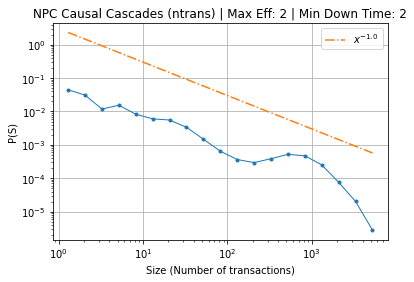

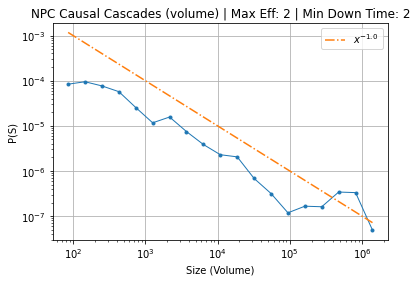

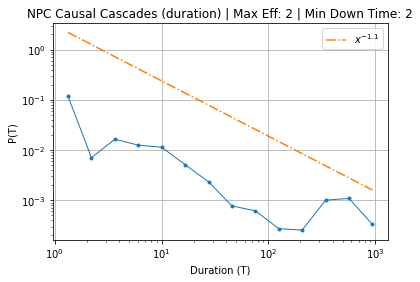

In [14]:
#npcsizes22, npcnrows22, npcduration22
hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0)*3, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0)/10, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*3, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

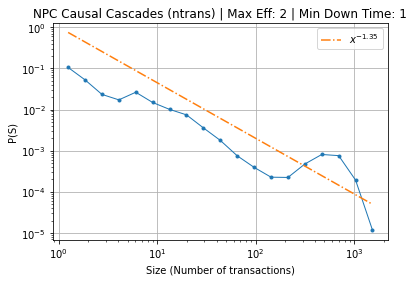

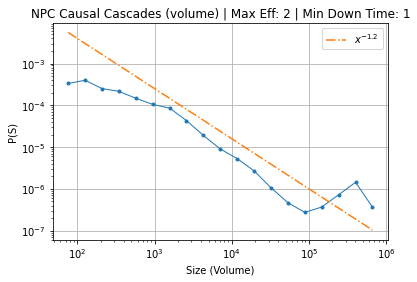

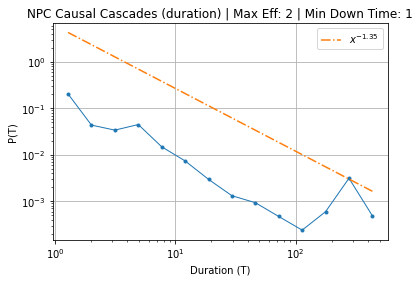

In [18]:
#npcsizes21, npcnrows21, npcduration21
hist, bins = np.histogram(npcnrows21, bins=np.logspace(np.log10(min(npcnrows21)),np.log10(max(npcnrows21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35), '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes21, bins=np.logspace(np.log10(min(npcsizes21)),np.log10(max(npcsizes21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.2), '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration21, bins=np.logspace(np.log10(min(npcduration21)),np.log10(max(npcduration21)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*6, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

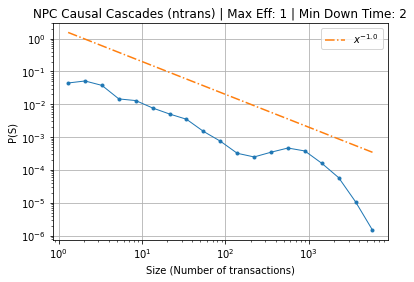

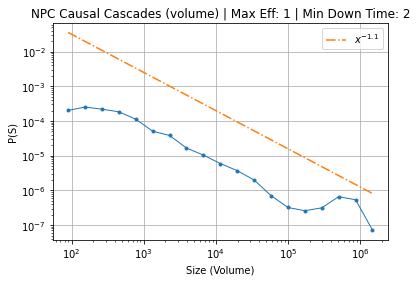

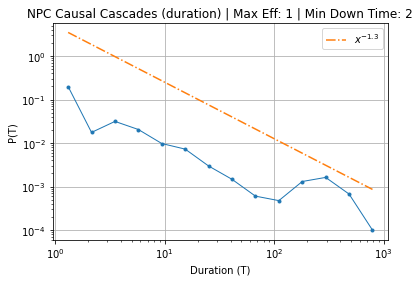

In [23]:
#npcsizes12, npcnrows12, npcduration12
hist, bins = np.histogram(npcnrows12, bins=np.logspace(np.log10(min(npcnrows12)),np.log10(max(npcnrows12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0)*2, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes12, bins=np.logspace(np.log10(min(npcsizes12)),np.log10(max(npcsizes12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration12, bins=np.logspace(np.log10(min(npcduration12)),np.log10(max(npcduration12)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.3)*5, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

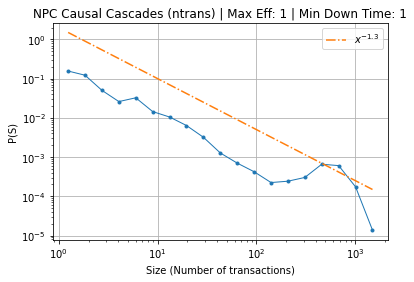

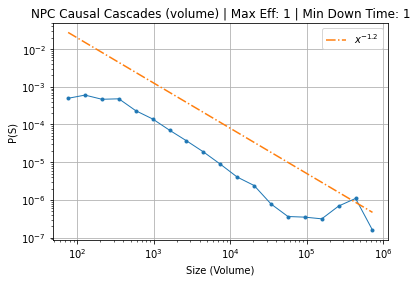

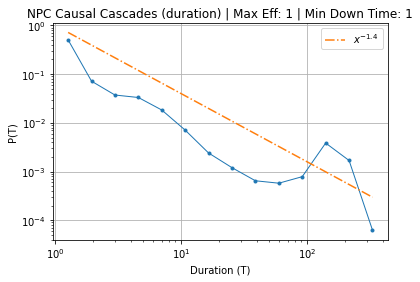

In [22]:
#npcsizes11, npcnrows11, npcduration11
hist, bins = np.histogram(npcnrows11, bins=np.logspace(np.log10(min(npcnrows11)),np.log10(max(npcnrows11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.3)*2, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes11, bins=np.logspace(np.log10(min(npcsizes11)),np.log10(max(npcsizes11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.2)*5, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration11, bins=np.logspace(np.log10(min(npcduration11)),np.log10(max(npcduration11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.4), '-.', label= "$x^{-1.4}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

In [12]:
import numpy 

# Troubleshooting

In [112]:
maxSep , maxtimeeff = 2,2
TtotalOrders = TtotalOrdersNPC
cascades = {}
numCascade = 0
# while len(TtotalOrders) > 0:
#     totalTimeOrders = TtotalOrders[TtotalOrders['time']==t]
    # seed with first portfolio
print("OG Orders left: ", len(TtotalOrders))
seed = TtotalOrders['portfolio'].loc[0]
t0 = TtotalOrders['time'].loc[0]

seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
cascades[numCascade] = seedCascade

# Dictionary keeping track of how long a stock is still "affected" from previous trade
stockTimes = {}

for row in np.asarray(seedCascade.index):
    row = row.item()
    stock = seedCascade['stock'].loc[row]
    time = seedCascade['time'].loc[row]
    order = seedCascade['order'].loc[row]
    if stock in stockTimes:
        stockTimes[stock] += abs(order)*maxtimeeff
    else:
        stockTimes[stock] = time + abs(order)*maxtimeeff

# check first cascade is greater than 0
assert len(seedCascade) > 0

# remove rows included in first cascade from the order list
TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)
# print(TtotalOrders)
print(seedCascade)
#PT2
#     # NEW VERSION (PORTFOLIO PERSPECTIVE)
for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
    match = False

#     # see if the current portfolio has overlapping stocks with the ongoing cascade 
    if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
#         # check if overlapping portfolio is already included in the ongoing cascade
        if childPortf not in cascades[numCascade]['portfolio']:
#             # include new portfolio into the cascade along with all of its cascading trading activity
            childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
#             # check if trading activity falls into the time affect window of ongoing cascade
            print(childPortfCascade)
            for row in np.asarray(childPortfCascade.index):
                row = row.item()
                stock = childPortfCascade['stock'].loc[row]
                time = childPortfCascade['time'].loc[row]
                order = childPortfCascade['order'].loc[row]
                if stock in stockTimes:
                    if time <= stockTimes[stock]:
                        match = True
                        print(stock)
                        break 
            if match == True:        
#                 # add new cascade to the ongoing cascade and remove rows from the orderList
                cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
#                 TtotalOrders = TtotalOrders[~TtotalOrders.isin(childPortfCascade)].dropna()
                TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
#                 # add new stocks and their time affects, or extend time affects of previous stocks
                for row in np.asarray(childPortfCascade.index):
                    row = row.item()
                    stock = childPortfCascade['stock'].loc[row]
                    time = childPortfCascade['time'].loc[row]
                    order = childPortfCascade['order'].loc[row]
                    if stock in stockTimes:
                        stockTimes[stock] += abs(order)*maxtimeeff
                    else:
                        stockTimes[stock] = time + abs(order)*maxtimeeff

print("Cascade length: ",len(cascades[numCascade]))
print("New Orders left: ", len(TtotalOrders))
print("making new cascade")
print("\n")
numCascade += 1

# print(cascadeStocks)
# print(cascadePortfs)
# print(cascadeTime)
# print(cascades)

OG Orders left:  7088505
      Unnamed: 0  time portfolio  stock  order
0              2   993     cwodj      2   -1.0
1              6   993     cwodj      6    1.0
2113           1   995     cwodj      1   -1.0
2114           2   995     cwodj      2   -1.0
2115           3   995     cwodj      3    4.0
2116           4   995     cwodj      4   -1.0
3146           1   996     cwodj      1   -1.0
      Unnamed: 0  time portfolio  stock  order
1499           3   994     agibt      3    1.0
1500           4   994     agibt     83   -1.0
1501           6   994     agibt     31    1.0
2529           3   995     agibt      3    3.0
2530           6   995     agibt     31   -2.0
4522           3   997     agibt      3    2.0
6536           3   999     agibt      3   -4.0
6537           6   999     agibt     31    1.0
7576           3  1000     agibt      3   -1.0
7577           4  1000     agibt     83    1.0
3
       Unnamed: 0  time portfolio  stock  order
478             2   993     ahik

       Unnamed: 0  time portfolio  stock  order
330             0   993     ajpet     51  -10.0
331             3   993     ajpet     24   10.0
332             4   993     ajpet     18    8.0
333             6   993     ajpet     54   -1.0
334             7   993     ajpet     91   -1.0
335             8   993     ajpet     43    1.0
1446            0   994     ajpet     51    2.0
1447            2   994     ajpet     88    5.0
1448            3   994     ajpet     24    7.0
1449            6   994     ajpet     54   -9.0
1450            7   994     ajpet     91   -4.0
1451            8   994     ajpet     43    3.0
3422            0   996     ajpet     51   -6.0
3423            2   996     ajpet     88    7.0
3424            3   996     ajpet     24   10.0
3425            4   996     ajpet     18   -6.0
3426            6   996     ajpet     54   -7.0
3427            7   996     ajpet     91    1.0
3428            8   996     ajpet     43    5.0
5491            0   998     ajpet     51

      Unnamed: 0  time portfolio  stock  order
716            2   993     aovfh     15    1.0
717            6   993     aovfh     20    1.0
718            7   993     aovfh     66   -2.0
1767           2   994     aovfh     15    1.0
1768           7   994     aovfh     66   -2.0
2771           2   995     aovfh     15   -1.0
2772           3   995     aovfh     35    2.0
3774           2   996     aovfh     15   -1.0
3775           6   996     aovfh     20   -1.0
3776           7   996     aovfh     66    2.0
4775           6   997     aovfh     20    1.0
15
       Unnamed: 0  time portfolio  stock  order
76              0   993     apxte     15    1.0
77              1   993     apxte     30    1.0
78              3   993     apxte     43    1.0
79              7   993     apxte     32   -3.0
80              8   993     apxte     56   -1.0
...           ...   ...       ...    ...    ...
86483           0  1075     apxte     15   -1.0
86484           1  1075     apxte     30   -1.0
8

KeyboardInterrupt: 

In [106]:
seed = TtotalOrders['portfolio'].iloc[0]
t0 = TtotalOrders['time'].iloc[0]

In [108]:
TtotalOrders

,Unnamed: 0,time,portfolio,stock,order
41,9,993,zjwdk,51,-2.0
69,2,993,ztnkc,15,1.0
70,4,993,ztnkc,60,-1.0
71,7,993,ztnkc,95,-1.0
262,3,993,zdmkf,98,9.0
...,...,...,...,...,...
7088500,2,8192,gnqpm,56,-25.0
7088501,3,8192,gnqpm,55,10.0
7088502,5,8192,gnqpm,79,2.0
7088503,6,8192,gnqpm,85,19.0


In [22]:
portfOrders = TtotalOrdersNPC[TtotalOrdersNPC['portfolio']=='cwodj']
portfOrders = portfOrders[portfOrders['time']>=993]
if len(portfOrders)>0:
    ToS = portfOrders['time'].unique()
#     print(ToS)
    sep = np.diff(ToS)
#     print(sep[:13])
#     print(max(sep))
    keySep = np.where(sep>2)[0]
#     print(keySep[:10])
    if len(keySep)>0:
        endtime = int(ToS.take(int(keySep[0]))) #end of this cascade
#         print(endtime)
#         print(ToS)
    else:
        endtime = int(ToS.take(-1))
    
    print("\n ENDTIME: ",(endtime))
    print(type(ToS))
    print(endtime, type(endtime))
#     print(type((endtime[int(keySep[0])])))
portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]



 ENDTIME:  996
<class 'cudf.core.series.Series'>
996 <class 'int'>


In [65]:
portfs = (TtotalOrders['portfolio'].unique()).values_host
# portfs.values_host

In [48]:
(seedCascade['stock'].loc[0]).item()

2

In [78]:
if childPortf in cascades[numCascade]['portfolio']

False

In [73]:
traderIDsNPC['gnqpm'].stocks

array([43, 26, 56, 55,  0, 79, 85, 76, 74])

In [43]:
type(np.asarray(seedCascade.index))

cupy.core.core.ndarray

In [79]:
a = pd.concat([seedCascade, seedCascade])


In [113]:
TtotalOrders.loc[TtotalOrders['time']<=993]

,Unnamed: 0,time,portfolio,stock,order
2,2,993,gozxi,6,-1.0
3,6,993,gozxi,10,2.0
4,7,993,gozxi,11,1.0
5,9,993,gozxi,13,-1.0
6,10,993,gozxi,14,-2.0
...,...,...,...,...,...
1081,7,993,zwjtq,55,-2.0
1082,0,993,myduz,56,14.0
1083,1,993,myduz,55,-18.0
1084,4,993,myduz,85,38.0
